# Обработка

In [1]:
print('Hello world')

Hello world


In [2]:
app_id = 'c938c288f79543ca8c49e75d57de7e79'
secret_id = '0902f9dfe6524cbd98583c3adabf862f'
#ya_token = 'y0_AgAAAAARWlwBAAro3QAAAADzXONBpys-VHXWRpyG0ic1Dj-EvarENgE'

In [3]:
# импортируем нужные библиотеки
import yadisk
import os
from tqdm import tqdm
import sys
from openpyxl import load_workbook
import glob
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# получаем токен для доступа к яндекс диску
y = yadisk.YaDisk(app_id, secret_id)
url = y.get_code_url()
print("Go to the following url: %s" % url)
code = input("Enter the confirmation code: ")
try:
 response = y.get_token(code)
except yadisk.exceptions.BadRequestError:
 print("Bad code")
 sys.exit(1)
y.token = response.access_token
if y.check_token():
 print("Sucessfully received token!")
else:
 print("Something went wrong. Not sure how though...")

Go to the following url: https://oauth.yandex.ru/authorize?response_type=code&client_id=c938c288f79543ca8c49e75d57de7e79&display=popup&force_confirm=yes


Enter the confirmation code:  2832236


Sucessfully received token!


In [5]:
# проверяем токен
y.check_token()

True

In [6]:
# смотрим диск
y.get_disk_info()

<DiskInfoObject{'max_file_size': 1073741824, 'paid_max_file_size': 53687091200, 'unlimited_autoupload_enabled': False, 'total_space': 11811160064, 'trash_size': 0, 'is_paid': False, 'used_space': 371690225, 'system_folders': <SystemFoldersObject{'odnoklassniki': 'disk:/Социальные сети/Одноклассники', 'google': 'disk:/Социальные сети/Google+', 'instagram': 'disk:/Социальные сети/Instagram', 'vkontakte': 'disk:/Социальные сети/ВКонтакте', 'attach': 'disk:/Почтовые вложения', 'mailru': 'disk:/Социальные сети/Мой Мир', 'downloads': 'disk:/Загрузки/', 'applications': 'disk:/Приложения', 'facebook': 'disk:/Социальные сети/Facebook', 'social': 'disk:/Социальные сети/', 'messenger': 'disk:/Файлы Мессенджера', 'calendar': 'disk:/Материалы встреч', 'photostream': 'disk:/Фотокамера/', 'screenshots': 'disk:/Скриншоты/', 'scans': 'disk:/Сканы'}>, 'user': <UserObject{'country': 'ru', 'login': 'simakk91', 'display_name': 'simakk91', 'uid': '291134465'}>, 'revision': 1701334077775498}>

In [7]:
# создаем список файлов для загрузки
list_of_files = []
for el in list(y.listdir('file_processor')):
 if el['path'].endswith('.xlsx'):
     list_of_files.append(el['path'])
list_of_files

['disk:/file_processor/2021_Таблица_005_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_006_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_007_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_012_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_013_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_014_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_015_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_016_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 'disk:/file_processor/2021_Таблица_017_Злокачественные_новообразования_в_РФ_(заболеваем

In [8]:
# создаем папку загрузки
load_path = 'C:/Users/Cергей/Downloads/project_practicum/'
if not os.path.exists(load_path):
 os.mkdir(load_path)
os.chdir(load_path)

In [9]:
# загружаем файлы с яндекс диска
for file in tqdm(list_of_files):
 y.download(file.split(':')[1], file.split('/')[-1])

100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [03:01<00:00,  1.24s/it]


In [10]:
# проверяем корректность загрузки
os.listdir('.')

['2021_Таблица_005_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_006_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_007_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_012_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_013_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_014_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_015_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_016_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_017_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_018_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_019_Злокачественные_новообразования_в_РФ_(заболеваемост

In [11]:
path = os.getcwd()
files = os.listdir(path)
len(files)

147

**Делим список на две части по названию файлов**

In [12]:
malignant_neoplasms = glob.glob('*Злокачественные*')
len(malignant_neoplasms)

87

In [13]:
state_of_aid = glob.glob('*Состояние*')
len(state_of_aid)

60

**Создаем списки с таблицами согласно техническому заданию**

In [14]:
convert_one_sop = []
convert_two_sop = []
convert_three_sop = []
for file in state_of_aid:
    number = str(file.split('_')[2])
    if int(number) in range(61, 86):
        convert_one_sop.append(file)
    if int(number) == 58:
        convert_one_sop.append(file)
    if int(number) in range(27, 52):
        convert_two_sop.append(file)
    if int(number) in [24, 52, 53]:
        convert_three_sop.append(file)
    else:
        pass

In [15]:
len(convert_one_sop)

26

In [16]:
len(convert_two_sop)

25

In [17]:
len(convert_three_sop)

3

In [18]:
convert_one_zno = []
for file in malignant_neoplasms:
    number = str(file.split('_')[2])
    if int(number) in range(12, 60):
        convert_one_zno.append(file)
    if int(number) in range(69, 104):
        convert_one_zno.append(file)
    else:
        pass

In [19]:
len(convert_one_zno)

83

**"Собираем" первую таблицу**

In [20]:
frame_one = []
for i in tqdm(convert_one_sop):
    header = load_workbook(i).active['A1'].value.split('  ')
    ind = ' '.join(header[0].split('\n')[0:2]).capitalize() 
    loc = header[0].split('\n')[2]
    table = header[-1].strip()
    xl_file_obj = pd.ExcelFile(i)
    for sheet_name in xl_file_obj.sheet_names:
        data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=2, index_col=None)
        if len(data.columns) == 10:
            data.columns = ['Регион',
                  'Число ЗНО, выявленных в отчетном году, радикальное лечение которых закончено в отчетном году, чел.',
                  'Число ЗНО, выявленных в отчетном году, радикальное лечение которых закончено в отчетном году, % от впервые выявленных',
                  'Число ЗНО, выявленных в отчетном году, радикальное лечение которых будет продолжено в отчетом году, чел.',
                  'Число ЗНО, выявленных в отчетном году, радикальное лечение которых будет продолжено в отчетном году, % от впервые выявленных',
                  'В том числе с использованием методов только хирургического, %',
                  'В том числе с использованием методов только лучевого, %',
                  'В том числе с использованием методов только лекарственного, %',
                  'В том числе с использованием методов комбинированного или комплексного (кроме химиолучевого), %',
                  'В том числе с использованием методов химиолучевого, %']
            data['Индикатор'] = ind
            data['Локализация'] = loc
            data['Таблица'] = table
            data['workbook'] = i
            data['page'] = sheet_name
            frame_one.append(data)
        else:
            pass

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 15.87it/s]


In [21]:
df_one_sop = pd.concat(frame_one)

In [22]:
df_one_sop.drop (index=df_one_sop.index[0], axis = 0, inplace = True )
df_one_sop

,Регион,"Число ЗНО, выявленных в отчетном году, радикальное лечение которых закончено в отчетном году, чел.","Число ЗНО, выявленных в отчетном году, радикальное лечение которых закончено в отчетном году, % от впервые выявленных","Число ЗНО, выявленных в отчетном году, радикальное лечение которых будет продолжено в отчетом году, чел.","Число ЗНО, выявленных в отчетном году, радикальное лечение которых будет продолжено в отчетном году, % от впервые выявленных","В том числе с использованием методов только хирургического, %","В том числе с использованием методов только лучевого, %","В том числе с использованием методов только лекарственного, %","В том числе с использованием методов комбинированного или комплексного (кроме химиолучевого), %","В том числе с использованием методов химиолучевого, %",Индикатор,Локализация,Таблица,workbook,page
1,ЦЕНТРАЛЬНЫЙ ФО,70193,49.6,27899,19.7,56.4,6.9,3.8,30.6,2.3,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
2,Белгородская область,3952,57.1,1418,20.5,53.6,12.7,2.9,27.9,2.9,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
3,Брянская область,2673,46.9,1236,21.7,54.0,2.3,7.6,34.3,1.8,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
4,Владимирская область,2858,51.9,808,14.7,59.0,2.4,0.0,37.5,1.1,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
5,Воронежская область,5305,58.8,1635,18.1,53.9,9.4,2.3,32.5,1.8,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,26,44.8,12,20.7,0.0,0.0,100.0,0.0,0.0,Сведения о лечении злокачественных новообразов...,Лейкемии (С91-95),Таблица 85,2021_Таблица_085_Состояние_онко_помощи_в_РФ.xlsx,Table 1
90,Чукотский авт.округ,0,0.0,1,100.0,0.0,0.0,0.0,0.0,0.0,Сведения о лечении злокачественных новообразов...,Лейкемии (С91-95),Таблица 85,2021_Таблица_085_Состояние_онко_помощи_в_РФ.xlsx,Table 1
91,Республика Бурятия,20,62.5,12,37.5,0.0,0.0,95.0,5.0,0.0,Сведения о лечении злокачественных новообразов...,Лейкемии (С91-95),Таблица 85,2021_Таблица_085_Состояние_онко_помощи_в_РФ.xlsx,Table 1
92,Республика Саха (Якутия),31,58.5,9,17.0,0.0,0.0,100.0,0.0,0.0,Сведения о лечении злокачественных новообразов...,Лейкемии (С91-95),Таблица 85,2021_Таблица_085_Состояние_онко_помощи_в_РФ.xlsx,Table 1


**"Собираем" вторую таблицу**

In [23]:
frame_two = []
frame_two_addition = []
for i in tqdm(convert_two_sop):
    header = load_workbook(i).active['A1'].value.split('  ')
    table = ''.join(header[-1]).strip().splitlines()[0] #номер таблицы
    ind = ''.join(header).split('\n')[0].strip().split('.')[0] #название таблицы
    year = ''.join(header).split('\n')[0].strip().split('.')[0].split()[-2] #год
    header2 = load_workbook(i).active['A1'].value.split('\n')
    loc = ''.join(header2[-1]).split('  ')[0] #локация болезни
    xl_file_obj = pd.ExcelFile(i)
    for sheet_name in xl_file_obj.sheet_names:
        data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=2, index_col=None)
        if len(data.columns) == 9 and sheet_name == 'Table 1' or sheet_name == 'Table 2':
            data.columns = ['Регион',
                   'Взято на учет больных с впервые в жизни уст. диагнозом ЗНО',
                   'в т.ч. вы- явлены активно,%',
                   'Находились на учете на конец года, абс.число',
                   'Находились на учете на конец года, на 100 тыс. населения',
                   'Из них 5 лет и более, абс.число',
                   'Из них 5 лет и более, %  от сост. на учете',
                   'Индекс накопления контингентов', 'Летальность,%']
            data['Индикатор'] = ind
            data['Локализация'] = loc
            data['Таблица'] = table
            data['Год'] = year
            data['workbook'] = i
            data['page'] = sheet_name
            frame_two.append(data)
        if len(data.columns) == 9 and sheet_name == 'Table 3' or sheet_name == 'Table 5':
            data.columns = ['Регион',
                   'Зарегистрировано ЗНО (без учтенных посмертно)',
                   'Диагноз подтвержден морфологически,%',
                   'Из них имели стадию заболевания 1,%',
                   'Из них имели стадию заболевания 2,%',
                   'Из них имели стадию заболевания 3,%',
                   'Из них имели стадию заболевания 4,%',
                   'Из них стадия не установлена,%', 
                   'Летальность на первом году с момента уст. диагноза,%']
            data['Локализация'] = loc
            data['Таблица'] = table
            data['Год'] = year
            data['workbook'] = i
            data['page'] = sheet_name
            frame_two_addition.append(data)
        else:
            pass

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:28<00:00,  1.13s/it]


In [24]:
# собираем таблицу
df_two_sop = pd.concat(frame_two)

In [25]:
# удаляем первую строку
df_two_sop.drop (index=df_two_sop.index[0], axis = 0, inplace = True )
df_two_sop

,Регион,Взято на учет больных с впервые в жизни уст. диагнозом ЗНО,"в т.ч. вы- явлены активно,%","Находились на учете на конец года, абс.число","Находились на учете на конец года, на 100 тыс. населения","Из них 5 лет и более, абс.число","Из них 5 лет и более, % от сост. на учете",Индекс накопления контингентов,"Летальность,%",Индикатор,Локализация,Таблица,Год,workbook,page
1,ЦЕНТРАЛЬНЫЙ ФО,308,41.6,6239,15.9,4679,75.0,20.3,1.2,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
2,Белгородская область,17,47.1,357,23.1,243,68.1,21.0,0.6,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
3,Брянская область,17,47.1,300,25.3,220,73.3,17.6,0.7,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
4,Владимирская область,16,12.5,275,20.4,201,73.1,17.2,1.8,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
5,Воронежская область,44,34.1,767,33.1,588,76.7,17.4,0.9,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,52,1.9,469,44.4,294,62.7,9.0,10.7,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2
90,Чукотский авт.округ,1,100.0,7,14.0,2,28.6,7.0,0.0,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2
91,Республика Бурятия,29,6.9,311,31.6,184,59.2,10.7,7.2,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2
92,Республика Саха (Якутия),52,11.5,379,38.8,238,62.8,7.3,6.0,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2


In [26]:
len(df_two_sop['Таблица'].unique())

25

**Бонусом собрали таблицу по второму листу в файле xl**

In [27]:
df_experiment = pd.concat(frame_two_addition)
df_experiment

,Регион,Зарегистрировано ЗНО (без учтенных посмертно),"Диагноз подтвержден морфологически,%","Из них имели стадию заболевания 1,%","Из них имели стадию заболевания 2,%","Из них имели стадию заболевания 3,%","Из них имели стадию заболевания 4,%","Из них стадия не установлена,%","Летальность на первом году с момента уст. диагноза,%",Локализация,Таблица,Год,workbook,page
0,NaN,NaN,NaN,I,II,III,IV,не уста- новлена,NaN,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
1,РОССИЯ,1881.0,99.4,53,30.5,10.5,5.5,0.5,3.5,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
2,ЦЕНТРАЛЬНЫЙ ФО,345.0,98.8,56.5,27.5,9.3,5.5,1.2,3.9,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
3,Белгородская область,23.0,100.0,47.8,30.4,8.7,8.7,4.3,15.8,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
4,Брянская область,20.0,100.0,35,40,20,5,0,9.1,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Забайкальский край,58.0,100.0,-,-,-,-,-,27.3,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5
91,Чукотский авт.округ,1.0,100.0,-,-,-,-,-,0.0,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5
92,Республика Бурятия,32.0,100.0,-,-,-,-,-,30.8,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5
93,Республика Саха (Якутия),53.0,100.0,-,-,-,-,-,25.0,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5


In [28]:
# удаляем первые две строки
df_experiment.drop (index=df_experiment.index[0:2], axis = 0, inplace = True )
df_experiment

,Регион,Зарегистрировано ЗНО (без учтенных посмертно),"Диагноз подтвержден морфологически,%","Из них имели стадию заболевания 1,%","Из них имели стадию заболевания 2,%","Из них имели стадию заболевания 3,%","Из них имели стадию заболевания 4,%","Из них стадия не установлена,%","Летальность на первом году с момента уст. диагноза,%",Локализация,Таблица,Год,workbook,page
2,ЦЕНТРАЛЬНЫЙ ФО,345.0,98.8,56.5,27.5,9.3,5.5,1.2,3.9,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
3,Белгородская область,23.0,100.0,47.8,30.4,8.7,8.7,4.3,15.8,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
4,Брянская область,20.0,100.0,35,40,20,5,0,9.1,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
5,Владимирская область,18.0,100.0,22.2,55.6,16.7,5.6,0,7.1,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
6,Воронежская область,47.0,100.0,57.4,21.3,17,4.3,0,2.3,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Забайкальский край,58.0,100.0,-,-,-,-,-,27.3,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5
91,Чукотский авт.округ,1.0,100.0,-,-,-,-,-,0.0,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5
92,Республика Бурятия,32.0,100.0,-,-,-,-,-,30.8,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5
93,Республика Саха (Якутия),53.0,100.0,-,-,-,-,-,25.0,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 5


**"Собираем" третью таблицу**

In [29]:
frame_three = []
frame_four = []
for i in tqdm(convert_one_zno):
    if i == '2021_Таблица_012_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx':
        ind = load_workbook(i).active['A2'].value.capitalize().strip() #название таблицы
        loc = load_workbook(i).active['A4'].value.strip() #локализация болезни
        table = load_workbook(i).active['A1'].value.strip() #номер таблицы
        year = load_workbook(i).active['A3'].value.strip() #год
    elif i == '2021_Таблица_020_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx':
        ind = load_workbook(i).active['A2'].value.capitalize().strip() #название таблицы
        loc = load_workbook(i).active['A4'].value.strip() #локализация болезни
        table = load_workbook(i).active['A1'].value.strip() #номер таблицы
        year = load_workbook(i).active['B3'].value.strip() #год
    elif i == '2021_Таблица_071_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx':
        ind = load_workbook(i).active['A2'].value.capitalize().strip() #название таблицы
        loc = load_workbook(i).active['A4'].value.strip() #локализация болезни
        table = load_workbook(i).active['A1'].value.strip() #номер таблицы
        year = load_workbook(i).active['B3'].value.strip() #год
    elif i == '2021_Таблица_051_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx':
        ind = load_workbook(i).active['A2'].value.capitalize().strip() #название таблицы
        loc = load_workbook(i).active['A4'].value.strip() #локализация болезни
        table = load_workbook(i).active['A1'].value.strip() #номер таблицы
        year = load_workbook(i).active['B3'].value.strip() #год
    else:   
        ind = load_workbook(i).active['A2'].value.capitalize().strip() #название таблицы
        loc = load_workbook(i).active['B4'].value.strip() #локализация болезни
        table = load_workbook(i).active['A1'].value.strip() #номер таблицы
        year = load_workbook(i).active['B3'].value#год
        xl_file_obj = pd.ExcelFile(i)
        for sheet_name in xl_file_obj.sheet_names:
            data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=6, index_col=None)
            if len(data.columns) == 13:
                data.columns = ['Регион',
                      'Все население абсолютное число',
                      'Все население показатель на 100 тыс. населения "грубый"',
                      'Все население показатель на 100 тыс. населения стандартизированный',
                      'Все население показатель на 100 тыс. населения ошибка',
                      'Мужчины абсолютное число',
                      'Мужчины показатель на 100 тыс. населения "грубый"',
                      'Мужчины показатель на 100 тыс. населения стандартизированный',
                      'Мужчины показатель на 100 тыс. населения ошибка',
                      'Женщины абсолютное число',
                      'Женщины показатель на 100 тыс. населения "грубый"',
                      'Женщины показатель на 100 тыс. населения стандартизированный',
                      'Женщины показатель на 100 тыс. населения ошибка']
                data['Индикатор'] = ind
                data['Локализация'] = loc
                data['Таблица'] = table
                data['Год'] = year
                data['workbook'] = i
                data['page'] = sheet_name
                frame_three.append(data)
            if len(data.columns) == 5:
                data.columns = ['Регион',
                      'Абсолютное число',
                      'Показатель на 100 тыс. населения "грубый"',
                      'Показатель на 100 тыс. населения стандартизированный',
                      'Показатель на 100 тыс. населения ошибка']
                data['Индикатор'] = ind
                data['Локализация'] = loc
                data['Таблица'] = table
                data['Год'] = year
                data['workbook'] = i
                data['page'] = sheet_name
                frame_four.append(data)
            else:
                pass

100%|██████████████████████████████████████████████████████████████████████████████████| 83/83 [01:38<00:00,  1.18s/it]


In [30]:
len(frame_three)

64

In [31]:
len(frame_four)

15

In [32]:
df_one_zno = pd.concat(frame_three)
df_one_zno

,Регион,Все население абсолютное число,"Все население показатель на 100 тыс. населения ""грубый""",Все население показатель на 100 тыс. населения стандартизированный,Все население показатель на 100 тыс. населения ошибка,Мужчины абсолютное число,"Мужчины показатель на 100 тыс. населения ""грубый""",Мужчины показатель на 100 тыс. населения стандартизированный,Мужчины показатель на 100 тыс. населения ошибка,Женщины абсолютное число,"Женщины показатель на 100 тыс. населения ""грубый""",Женщины показатель на 100 тыс. населения стандартизированный,Женщины показатель на 100 тыс. населения ошибка,Индикатор,Локализация,Таблица,Год,workbook,page
0,РОССИЯ,1902,"1,30","0,65","0,02",1422,"2,10","1,33","0,04",480,"0,61","0,21","0,01",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
1,ЦЕНТРАЛЬНЫЙ ФО,347,"0,89","0,41","0,02",246,"1,36","0,79","0,05",101,"0,48","0,16","0,02",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
2,Белгородская область,23,"1,50","0,67","0,15",12,"1,69","0,97","0,29",11,"1,33","0,42","0,14",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
3,Брянская область,20,"1,70","0,79","0,19",14,"2,60","1,56","0,42",6,"0,94","0,30","0,15",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
4,Владимирская область,18,"1,35","0,56","0,14",12,"1,98","1,09","0,32",6,"0,83","0,24","0,11",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,16435,1567.51,1014.09,8.26,8382,1667.9,1410.4,15.86,8053,1475.1,741.09,9.0,Смертность населения территорий россии от злок...,Все причины смерти,Таблица 103,2021,2021_Таблица_103_Злокачественные_новообразован...,1-2
90,Чукотский авт.округ,532,1068.63,1011.62,57.25,350,1383.56,1306.35,104.35,182,743.27,745.22,67.54,Смертность населения территорий россии от злок...,Все причины смерти,Таблица 103,2021,2021_Таблица_103_Злокачественные_новообразован...,1-2
91,Республика Бурятия,13445,1366.32,872.86,7.92,6950,1478.61,1252.97,15.46,6495,1263.64,618.25,8.48,Смертность населения территорий россии от злок...,Все причины смерти,Таблица 103,2021,2021_Таблица_103_Злокачественные_новообразован...,1-2
92,Республика Саха (Якутия),10499,1063.68,813.31,8.09,5722,1188.14,1094.65,14.96,4777,945.1,593.97,8.87,Смертность населения территорий россии от злок...,Все причины смерти,Таблица 103,2021,2021_Таблица_103_Злокачественные_новообразован...,1-2


In [33]:
# удалим первую строку
df_one_zno.drop (index=df_one_zno.index[0], axis = 0, inplace = True )

In [34]:
df_two_zno = pd.concat(frame_four)
df_two_zno

,Регион,Абсолютное число,"Показатель на 100 тыс. населения ""грубый""",Показатель на 100 тыс. населения стандартизированный,Показатель на 100 тыс. населения ошибка,Индикатор,Локализация,Таблица,Год,workbook,page
0,ЦЕНТРАЛЬНЫЙ ФО,541,"2,56","1,02","0,05",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
1,Белгородская область,25,"3,03","1,19","0,27",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
2,Брянская область,29,"4,55","2,04","0,46",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
3,Владимирская область,24,"3,30","1,11","0,26",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
4,Воронежская область,36,"2,90","1,12","0,20",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
...,...,...,...,...,...,...,...,...,...,...,...
88,Забайкальский край,2,"0,40","0,40","0,30",Смертность населения россии от злокачественных...,"Другие мужские половые органы (С60,62,63)",Таблица 92,2021,2021_Таблица_092_Злокачественные_новообразован...,1-1
89,Чукотский авт.округ,0,"0,00","0,00","0,00",Смертность населения россии от злокачественных...,"Другие мужские половые органы (С60,62,63)",Таблица 92,2021,2021_Таблица_092_Злокачественные_новообразован...,1-1
90,Республика Бурятия,2,"0,43","0,30","0,21",Смертность населения россии от злокачественных...,"Другие мужские половые органы (С60,62,63)",Таблица 92,2021,2021_Таблица_092_Злокачественные_новообразован...,1-1
91,Республика Саха (Якутия),2,"0,42","0,36","0,25",Смертность населения россии от злокачественных...,"Другие мужские половые органы (С60,62,63)",Таблица 92,2021,2021_Таблица_092_Злокачественные_новообразован...,1-1


**Посмотрим какие таблицы не обработаны**

In [35]:
list_1 = list(df_one_sop['workbook'].unique())
list_2 = list(df_two_sop['workbook'].unique())
list_3 = list(df_experiment['workbook'].unique())
list_4 = list(df_one_zno['workbook'].unique())
list_5 = list(df_two_zno['workbook'].unique())

In [36]:
new_arr = set(list_1+list_2+list_3+list_4+list_5)
len(new_arr)

130

In [37]:
len(files)

147

In [38]:
lost_tables = list(set(files)-new_arr)
lost_tables

['2021_Таблица_005_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_006_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_052_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_007_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_012_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_071_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_020_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx',
 '2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_053_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_024

**Обрабатываем таблицы 5 и 65**

In [39]:
table_5 = ['2021_Таблица_005_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx']

In [40]:
frame_five = []
for i in tqdm(table_5):
    header = load_workbook(i).active['A1'].value.split('  ')
    name = ''.join(header).split('\n')[0].strip().split('.')[0] #название таблицы
    xl_file_obj = pd.ExcelFile(i)
    for sheet_name in xl_file_obj.sheet_names:
        if sheet_name == 'Table 1':
            data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=[1,2])
            df = data.dropna(thresh=int(len(data) * .10), axis=1) #удаляем столбцы в которых 100% пропусков
            df.columns = ['Регион', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
                            'Среднегодовой темп прироста, %', 'Прирост, %']
            df['gender'] = df['Регион'] # дублируем столбец со значениями регионов
            null_data = df[df.isnull().any(axis=1)] # выбираем строки в которых есть пропуски
            ind = list(null_data.index) # создаем список индексов строк в которых есть пропуски
            list_null = null_data['gender'].tolist() # создаем список строк в которых есть пропуски
            table_not_null = df[~df.gender.isin(list_null)] # создаем таблицу без строк с пропусками
            table_not_null.loc[:,'gender'] = np.nan # заполняем ненужные значения пропусками
            conc_table = pd.concat([table_not_null, null_data]) #объединяем таблицы
            conc_table.sort_index(inplace=True) # сортируем по индексу
            conc_table.ffill(inplace=True) # заполняем пропуски из верхней ячейки
            conc_table.drop(ind, inplace=True) # удаляем строки с пропусками
            conc_table['workbook'] = i # добавляем столбик с названием файла
            conc_table['name_table'] = name # название таблицы
            frame_five.append(conc_table)
        elif sheet_name != 'Table 1':
            data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=1)
            df = data.dropna(thresh=int(len(data) * .10), axis=1) #удаляем столбцы в которых 100% пропусков
            df.columns = ['Регион', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
                            'Среднегодовой темп прироста, %', 'Прирост, %']
            df['gender'] = df['Регион'] # дублируем столбец со значениями регионов
            null_data = df[df.isnull().any(axis=1)] # выбираем строки в которых есть пропуски
            ind = list(null_data.index) # создаем список индексов строк в которых есть пропуски
            list_null = null_data['gender'].tolist() # создаем список строк в которых есть пропуски
            table_not_null = df[~df.gender.isin(list_null)] # создаем таблицу без строк с пропусками
            table_not_null.loc[:,'gender'] = np.nan # заполняем ненужные значения пропусками
            conc_table = pd.concat([table_not_null, null_data]) #объединяем таблицы
            conc_table.sort_index(inplace=True) # сортируем по индексу
            conc_table.ffill(inplace=True) # заполняем пропуски из верхней ячейки
            conc_table.drop(ind, inplace=True) # удаляем строки с пропусками
            conc_table['workbook'] = i # добавляем столбик с названием файла
            conc_table['name_table'] = name
            frame_five.append(conc_table)
        else:
            pass

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.19it/s]


In [41]:
df_table_five = pd.concat(frame_five)

In [42]:
df_table_five

,Регион,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,"Среднегодовой темп прироста, %","Прирост, %",gender,workbook,name_table
1,РОССИЯ,365.42,367.29,373.42,388.03,402.57,408.62,420.3,425.46,436.34,379.65,397.91,1.13,12.05,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
2,Центральный Федеральный округ,377.39,374.5,384.46,396.27,413.72,412.33,425.94,431.95,436.74,368.21,379.33,"0,51*","5,26*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
3,Северо-Западный Федеральный округ,378.06,381.02,388.06,407.59,445.03,451.16,450.61,454.01,476.68,417.19,428.18,1.62,17.83,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
4,Южный Федеральный округ**,389.64,404.36,400.32,400.98,396.57,415.06,429.76,435.82,439.87,386.08,406.93,"0,20*","1,41*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
5,Северо-Кавказский Федеральный округ,240.69,236.56,233.43,242.28,254.1,256.96,262.03,264.43,267.2,238.37,249.19,"0,74*","7,72*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
6,Приволжский Федеральный округ,371.85,373.66,385.31,405.66,415.97,424.52,434.88,436.1,451.78,399.85,424.68,1.43,15.55,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
7,Уральский Федеральный округ,362.22,362.97,366.44,374.69,392.56,397.67,414.75,421.94,440.17,389.49,420.52,1.69,18.67,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
8,Сибирский Федеральный округ***,387.77,394.11,395.09,417.31,432.26,441.76,455.09,464.5,474.03,417.47,435.17,1.45,15.78,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
9,Дальневосточ. Федеральный округ***,326.45,325.87,336.47,356.18,369.37,375.8,394.66,403.52,417.56,359.52,387.28,1.98,22.21,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
11,РОССИЯ,363.18,363.61,368.97,383.27,398.1,402.51,414.06,419.85,427.98,376.65,391.2,1.06,11.3,МУЖЧИНЫ («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насел...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...


In [43]:
table_65 = ['2021_Таблица_065_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx']

In [44]:
frame_six = []
for i in tqdm(table_65):
    header = load_workbook(i).active['A1'].value.split('  ')
    name = ''.join(header).split('\n')[0].strip().split('.')[0] #название таблицы
    xl_file_obj = pd.ExcelFile(i)
    for sheet_name in xl_file_obj.sheet_names:
        if sheet_name == 'Table 3':
            data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=[1,2])
            df = data.dropna(thresh=int(len(data) * .10), axis=1) #удаляем столбцы в которых 100% пропусков
            df.columns = ['Регион', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
                            'Среднегодовой темп прироста, %', 'Прирост, %']
            df['gender'] = df['Регион'] # дублируем столбец со значениями регионов
            null_data = df[df.isnull().any(axis=1)] # выбираем строки в которых есть пропуски
            ind = list(null_data.index) # создаем список индексов строк в которых есть пропуски
            list_null = null_data['gender'].tolist() # создаем список строк в которых есть пропуски
            table_not_null = df[~df.gender.isin(list_null)] # создаем таблицу без строк с пропусками
            table_not_null.loc[:,'gender'] = np.nan # заполняем ненужные значения пропусками
            conc_table = pd.concat([table_not_null, null_data]) #объединяем таблицы
            conc_table.sort_index(inplace=True) # сортируем по индексу
            conc_table.ffill(inplace=True) # заполняем пропуски из верхней ячейки
            conc_table.drop(ind, inplace=True) # удаляем строки с пропусками
            conc_table['workbook'] = i # добавляем столбик с названием файла
            conc_table['name_table'] = name # название таблицы
            frame_six.append(conc_table)
        elif sheet_name != 'Table 3':
            data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=1)
            df = data.dropna(thresh=int(len(data) * .10), axis=1) #удаляем столбцы в которых 100% пропусков
            df.columns = ['Регион', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
                            'Среднегодовой темп прироста, %', 'Прирост, %']
            df['gender'] = df['Регион'] # дублируем столбец со значениями регионов
            null_data = df[df.isnull().any(axis=1)] # выбираем строки в которых есть пропуски
            ind = list(null_data.index) # создаем список индексов строк в которых есть пропуски
            list_null = null_data['gender'].tolist() # создаем список строк в которых есть пропуски
            table_not_null = df[~df.gender.isin(list_null)] # создаем таблицу без строк с пропусками
            table_not_null.loc[:,'gender'] = np.nan # заполняем ненужные значения пропусками
            conc_table = pd.concat([table_not_null, null_data]) #объединяем таблицы
            conc_table.sort_index(inplace=True) # сортируем по индексу
            conc_table.ffill(inplace=True) # заполняем пропуски из верхней ячейки
            conc_table.drop(ind, inplace=True) # удаляем строки с пропусками
            conc_table['workbook'] = i # добавляем столбик с названием файла
            conc_table['name_table'] = name
            frame_six.append(conc_table)
        else:
            pass

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.44it/s]


In [45]:
df_table_sixty_five = pd.concat(frame_six)

In [46]:
df_table_sixty_five

,Регион,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,"Среднегодовой темп прироста, %","Прирост, %",gender,workbook,name_table
1,РОССИЯ,202.53,200.98,201.13,199.49,202.50,201.62,197.94,200.03,200.59,199.00,191.27,-0.31,-3.09,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
2,Центральный Федеральный округ,220.91,219.72,220.18,216.82,215.16,215.77,206.97,209.92,208.17,206.53,198.26,-0.96,-9.09,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
3,Северо-Западный Федеральный округ,228.45,227.61,229.27,231.93,232.98,232.23,232.10,228.88,234.64,227.88,213.65,"-0,25*","-2,49*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
4,Южный Федеральный округ**,205.62,203.16,200.13,192.77,201.79,200.83,196.26,197.64,193.36,194.44,190.18,"0,71*","-5,10*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
5,Северо-Кавказский Федеральный округ,119.80,118.01,118.28,116.96,118.51,118.02,112.49,111.83,107.45,112.25,109.87,-0.96,-9.11,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
6,Приволжский Федеральный округ,191.30,189.54,190.43,191.20,196.69,192.72,190.65,192.32,194.68,193.86,186.62,"0,02*","0,19*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
7,Уральский Федеральный округ,200.09,198.55,196.32,196.34,193.82,195.99,195.94,202.50,203.68,196.08,188.66,"-0,15*","-1,51*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
8,Сибирский Федеральный округ***,212.54,210.20,210.80,209.85,214.36,216.51,216.60,219.61,223.43,224.86,216.33,0.57,5.88,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
9,Дальневосточ. Федеральный округ***,187.12,186.31,188.05,184.04,192.58,192.66,192.33,197.02,201.90,197.06,189.66,0.58,6.03,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...
11,РОССИЯ,234.27,231.34,231.25,229.31,232.96,234.27,228.77,231.90,231.77,230.09,220.71,"-0,28*","-2,72*",МУЖЧИНЫ («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насел...,2021_Таблица_065_Злокачественные_новообразован...,Динамика показателей смертности населения Феде...


**Обрабатываем таблицы 24, 52, 53**

In [47]:
convert_three_sop

['2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_052_Состояние_онко_помощи_в_РФ.xlsx',
 '2021_Таблица_053_Состояние_онко_помощи_в_РФ.xlsx']

In [48]:
frame_seven = []
for i in tqdm(convert_three_sop):
    num_tab = load_workbook(i)['Table 1']['A1'].value.split()
    num_table = ''.join(num_tab[-2:]) # номер таблицы
    header = load_workbook(i)['Table 1']['A1'].value.split('  ')
    name = ''.join(header[0].split('\n')[:2]) # название таблицы
    ident = ''.join(header[0].split('\n')[-1]) # категория населения
    data = pd.read_excel(i, header=[1,2])
    data.columns = ['Регион', 
                    'Взято на учет больных с впервые в жизни уст. диагнозом ЗНО',
                    'в т.ч. выявлены активно, %', 
                    'Находились на учете на конец года абсолютное число', 
                    'Находились на учете на конец года на 100 тыс. населения', 
                    'из них 5 лет и более абсолютное число', 
                    'из них 5 лет и более % от сост. на учете', 
                    'Индекс накопления контингентов', 
                    'Леталь- ность, %']
    data['name_table'] = name
    data['category_people'] = ident
    data['number_table'] = num_table
    data['workbook'] = i
    frame_seven.append(data)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.95it/s]


In [49]:
df_three_sop = pd.concat(frame_seven)

In [50]:
df_three_sop.head()

,Регион,Взято на учет больных с впервые в жизни уст. диагнозом ЗНО,"в т.ч. выявлены активно, %",Находились на учете на конец года абсолютное число,Находились на учете на конец года на 100 тыс. населения,из них 5 лет и более абсолютное число,из них 5 лет и более % от сост. на учете,Индекс накопления контингентов,"Леталь- ность, %",name_table,category_people,number_table,workbook
0,РОССИЯ,490588,24.1,3940529,2690.5,2262078,57.4,8.0,5.2,СВЕДЕНИЯ О КОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕН...,Злокачественные новообразования - всего (С00-96),Таблица24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,129871,24.1,1147377,2916.4,666555,58.1,8.8,4.5,СВЕДЕНИЯ О КОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕН...,Злокачественные новообразования - всего (С00-96),Таблица24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,6134,27.4,44114,2854.9,24836,56.3,7.2,5.1,СВЕДЕНИЯ О КОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕН...,Злокачественные новообразования - всего (С00-96),Таблица24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,5137,20.3,38258,3221.5,21775,56.9,7.4,6.0,СВЕДЕНИЯ О КОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕН...,Злокачественные новообразования - всего (С00-96),Таблица24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,4986,10.6,44686,3309.4,26554,59.4,9.0,4.1,СВЕДЕНИЯ О КОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕН...,Злокачественные новообразования - всего (С00-96),Таблица24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx


In [51]:
df_three_sop['number_table'].unique()

array(['Таблица24', 'Таблица52', 'Таблица53'], dtype=object)

**Отдельно обработаем второй лист 24 таблицы**

In [52]:
table_24 = ['2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx']

In [53]:
frame_eight = []
for i in table_24:
    num_table = load_workbook(i).active['A1'].value.split('  ')[-1].strip() # номер таблицы
    header = load_workbook(i).active['A1'].value.split('  ')[0]
    name = header.split('\n')[0] # название таблицы
    ident = header.split('\n')[-1] # категория населения
    xl_file_obj = pd.ExcelFile(i)
    for n, sheet_name in enumerate(xl_file_obj.sheet_names):
        if n == 1:
            data = pd.read_excel(xl_file_obj, sheet_name=sheet_name, header=[1,2,3])
            data.columns = ['Регион',
                            'Зарегистрировано ЗНО (без учтенных посмертно)',
                            'диагноз подтвержден морфологически, %',
                            'из них имели стадию заболевания 1, %',
                            'из них имели стадию заболевания 2, %',
                            'из них имели стадию заболевания 3, %',
                            'из них имели стадию заболевания 4, %',
                            'из них имели стадию заболевания - не установлено, %',
                            'Летальность на первом году с момента уст. диагноза, %']
            data['name_table'] = name
            data['category_people'] = ident
            data['number_table'] = num_table
            data['workbook'] = i
            frame_eight.append(data)
            print(sheet_name)
        

Table 3


In [54]:
df_table_24_two_page = pd.concat(frame_eight)

In [55]:
df_table_24_two_page

,Регион,Зарегистрировано ЗНО (без учтенных посмертно),"диагноз подтвержден морфологически, %","из них имели стадию заболевания 1, %","из них имели стадию заболевания 2, %","из них имели стадию заболевания 3, %","из них имели стадию заболевания 4, %","из них имели стадию заболевания - не установлено, %","Летальность на первом году с момента уст. диагноза, %",name_table,category_people,number_table,workbook
0,РОССИЯ,540304,95.2,32.4,25.5,17.2,20.5,4.4,20.3,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,141448,95.4,33.4,25.7,16.8,19.4,4.7,17.8,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,6925,94.5,36.2,26.2,15.3,18.6,3.7,18.7,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,5702,97.1,31.3,18.6,17.0,28.6,4.6,26.4,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,5503,96.8,30.4,23.7,18.0,23.5,4.5,20.5,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,3397,94.8,34.7,24.9,18.9,17.5,3.9,19.7,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,112,95.5,28.6,18.8,19.6,25.9,7.1,35.2,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,3380,94.1,22.5,32.5,21.5,18.4,5.1,22.1,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),2303,94.4,29.0,16.4,21.7,26.8,6.0,29.5,ПОКАЗАТЕЛИ ДИАГНОСТИКИ ЗЛОКАЧЕСТВЕННЫХ НОВООБР...,Злокачественные новообразования - всего (С00-96),Продолжение таблицы 24,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx


**Обрабатываем таблицу 6**

In [56]:
table_6 = '2021_Таблица_006_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx'

In [57]:
frame_nine = []
header = load_workbook(table_6).active['A1'].value.split('\n')
name = str(header[1:2]) # название таблицы
num_table = header[0] # номер таблицы
data = pd.read_excel(table_6, header=[1,2,3])
data.columns = ['Регион',
                'Городское население абсолютное значение оба пола',
                'Городское население абсолютное значение М',
                'Городское население абсолютное значение Ж',
                'Городское население "грубый" показатель на 100 тыс. населения оба пола',
                'Городское население "грубый" показатель на 100 тыс. населения М',
                'Городское население "грубый" показатель на 100 тыс. населения Ж',
                'Сельское население абсолютное значение оба пола',
                'Сельское население абсолютное значение М',
                'Сельское население абсолютное значение Ж',
                'Сельское население "грубый" показатель на 100 тыс. населения оба пола',
                'Сельское население "грубый" показатель на 100 тыс. населения М',
                'Сельское население "грубый" показатель на 100 тыс. населения Ж',]
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = i
frame_nine.append(data)

In [58]:
df_table_6_zno = pd.concat(frame_nine)
df_table_6_zno

,Регион,Городское население абсолютное значение оба пола,Городское население абсолютное значение М,Городское население абсолютное значение Ж,"Городское население ""грубый"" показатель на 100 тыс. населения оба пола","Городское население ""грубый"" показатель на 100 тыс. населения М","Городское население ""грубый"" показатель на 100 тыс. населения Ж",Сельское население абсолютное значение оба пола,Сельское население абсолютное значение М,Сельское население абсолютное значение Ж,"Сельское население ""грубый"" показатель на 100 тыс. населения оба пола","Сельское население ""грубый"" показатель на 100 тыс. населения М","Сельское население ""грубый"" показатель на 100 тыс. населения Ж",name_table,number_table,workbook
0,РОССИЯ,447592,197074,250518,410.4,394.7,423.6,132823,67965,64858,361.0,381.4,341.9,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,122557,53125,69432,379.6,360.3,395.8,26056,13165,12891,378.0,400.0,357.8,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,4601,2108,2493,442.7,443.8,441.7,2436,1182,1254,489.9,500.5,480.3,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,4656,2082,2574,561.6,558.2,564.3,1363,720,643,393.2,435.4,354.8,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,4914,2095,2819,471.6,447.5,491.3,1248,657,591,429.0,475.4,387.0,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,2266,1003,1263,315.4,296.5,332.3,1164,552,612,352.6,336.1,368.9,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,90,44,46,252.7,242.4,263.3,33,28,5,233.0,391.9,71.3,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,1982,824,1158,340.7,304.8,371.9,1473,710,763,366.1,355.6,376.5,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),1819,858,961,276.6,269.7,283.0,687,342,345,208.6,209.2,208.0,['ЗАБОЛЕВАЕМОСТЬ ГОРОДСКОГО И СЕЛЬСКОГО НАСЕЛЕ...,Таблица 6,2021_Таблица_024_Состояние_онко_помощи_в_РФ.xlsx


**Обработаем таблицу 7**

In [59]:
table_7 = '2021_Таблица_007_Злокачественные_новообразования_в_РФ_(заболеваемость_и_смертность).xlsx'

In [60]:
frame_ten = []
header = load_workbook(table_7).active['A1'].value.split('  ')
name = str(header[0]) # название таблицы
num_table = header[-1] # номер таблицы
data = pd.read_excel(table_7, header=[1,2,3])
data.columns = ['Регион',
                'Выявлено cr in situ всего абс. число',
                'Выявлено cr in situ всего на 100 впервые выявл. ЗНО',
                'из них cr in situ шейки матки абс. число',
                'из них cr in situ шейки матки на 100 ЗНО шейки матки',
                'из них cr in situ молочной железы абс. число',
                'из них cr in situ молочной железы на 100 ЗНО\nмолочной железы']
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = table_7
frame_ten.append(data)

In [61]:
df_table7_zno = pd.concat(frame_ten)

In [62]:
df_table7_zno

,Регион,Выявлено cr in situ всего абс. число,Выявлено cr in situ всего на 100 впервые выявл. ЗНО,из них cr in situ шейки матки абс. число,из них cr in situ шейки матки на 100 ЗНО шейки матки,из них cr in situ молочной железы абс. число,из них cr in situ молочной железы на 100 ЗНО\nмолочной железы,name_table,number_table,workbook
0,РОССИЯ,10543,1.8,5159,33.6,1758,2.5,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
1,ЦЕНТРАЛЬНЫЙ ФО,2853,1.9,1310,37.5,563,2.9,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
2,Белгородская область,63,0.9,28,20.3,8,1.0,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
3,Брянская область,239,4.0,113,86.9,6,1.0,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
4,Владимирская область,97,1.6,42,24.4,5,0.7,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,235,6.9,205,108.5,5,1.4,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
90,Чукотский авт.округ,0,0.0,0,0.0,0,0.0,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
91,Республика Бурятия,100,2.9,33,11.9,22,5.9,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...
92,Республика Саха (Якутия),40,1.6,15,11.5,21,9.2,НОВООБРАЗОВАНИЯ IN SITU В 2021 Г.,Таблица 7,2021_Таблица_007_Злокачественные_новообразован...


**Обрабатываем таблицу 19**

In [63]:
table_19 = '2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx'

In [64]:
frame_ten = []
header = load_workbook(table_19).active['A1'].value.split('  ')
name = ''.join(header[0].split('\n'))
num_table = ''.join(header[-2:]).strip()
data = pd.read_excel(table_19, header=[1,2,3])
data.columns = ['Регион',
                'Выявлены активно абс. число',
                'Выявлены активно % от числа больных с впервые уст. диагнозом',
                'Выявлены активно, из них имели I-II ст. заболевания абс. число',
                'Выявлены активно, из них имели I-II ст. заболевания % от числа больных с вперв. уст. диагнозом',
                'Выявлены активно, из них имели I-II ст. заболевания % от числа больных, выявл. активно',
                'Выявлены активно% больных с ЗНО\nвизуал. локализ. I-II ст. из выявл. активно',
                'Из общ. числа больных, состоящих на учете на конец года сельские жители',
                'Из общ. числа больных, состоящих на учете на конец года %',
                'Из общ. числа больных, состоящих на учете на конец года имели ПМ ЗНО',
                'Из общ. числа больных, со- стоящих на учете на конец года %']
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = table_19
frame_ten.append(data)

In [65]:
df_table19_sop = pd.concat(frame_ten) 

In [66]:
df_table19_sop

,Регион,Выявлены активно абс. число,Выявлены активно % от числа больных с впервые уст. диагнозом,"Выявлены активно, из них имели I-II ст. заболевания абс. число","Выявлены активно, из них имели I-II ст. заболевания % от числа больных с вперв. уст. диагнозом","Выявлены активно, из них имели I-II ст. заболевания % от числа больных, выявл. активно",Выявлены активно% больных с ЗНО\nвизуал. локализ. I-II ст. из выявл. активно,"Из общ. числа больных, состоящих на учете на конец года сельские жители","Из общ. числа больных, состоящих на учете на конец года %","Из общ. числа больных, состоящих на учете на конец года имели ПМ ЗНО","Из общ. числа больных, со- стоящих на учете на конец года %",name_table,number_table,workbook
0,РОССИЯ,118130,24.1,91886,18.7,77.8,48.8,825529,20.9,236857,6.0,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,31295,24.1,23602,18.2,75.4,45.3,172439,15.0,70994,6.2,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,1681,27.4,1399,22.8,83.2,53.4,15386,34.9,3072,7.0,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,1042,20.3,703,13.7,67.5,48.6,8082,21.1,3165,8.3,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,531,10.6,488,9.8,91.9,65.0,8091,18.1,2478,5.5,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,594,19.4,511,16.7,86.0,54.9,8482,31.7,1915,7.2,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,53,49.5,36,33.6,67.9,22.6,125,19.5,8,1.2,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,816,26.3,643,20.7,78.8,46.9,8668,44.2,871,4.4,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),637,29.7,400,18.7,62.8,25.9,3279,26.1,501,4.0,ДОПОЛНИТЕЛЬНЫЕ ПОКАЗАТЕЛИ СОСТОЯНИЯ ОНКОЛОГИЧЕ...,Таблица19,2021_Таблица_019_Состояние_онко_помощи_в_РФ.xlsx


**Обрабатываем таблицу 20**

In [67]:
table_20 = '2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx'

In [68]:
frame_eleven = []
header = load_workbook(table_20).active['A1'].value.split('  ')
name = ''.join(header[0].split('\n'))
num_table = header[-1].strip()
data = pd.read_excel(table_20, header=[1,2])
data.columns = ['Регион',
                'Число ПМ ЗНО, выявленных в отч. году абсолютное число',
                'Число ПМ ЗНО, выявленных в отч. году % от впервые выявленных ЗНО',
                'из них ПМ ЗНО, выявленные у больных, взятых на учет в отч. году с впервые в жизни уст. диагнозом, %',
                'Из общего числа больных, состоящих на учете на конец года, имеют ПМ ЗНО абсолютное число',
                'Из общего числа больных, состоящих на учете на конец года, имеют ПМ ЗНО %']
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = table_20
frame_eleven.append(data)

In [69]:
df_table20_sop = pd.concat(frame_eleven)

In [70]:
df_table20_sop

,Регион,"Число ПМ ЗНО, выявленных в отч. году абсолютное число","Число ПМ ЗНО, выявленных в отч. году % от впервые выявленных ЗНО","из них ПМ ЗНО, выявленные у больных, взятых на учет в отч. году с впервые в жизни уст. диагнозом, %","Из общего числа больных, состоящих на учете на конец года, имеют ПМ ЗНО абсолютное число","Из общего числа больных, состоящих на учете на конец года, имеют ПМ ЗНО %",name_table,number_table,workbook
0,РОССИЯ,58217,10.0,26.1,236857,6.0,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,13669,9.2,32.5,70994,6.2,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,849,12.1,25.0,3072,7.0,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,710,11.8,30.1,3165,8.3,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,682,11.1,40.5,2478,5.5,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,331,9.7,20.5,1915,7.2,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,7,5.7,57.1,8,1.2,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,276,8.0,16.3,871,4.4,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),160,6.4,24.4,501,4.0,ПЕРВИЧНО-МНОЖЕСТВЕННЫЕ ЗЛОКАЧЕСТВЕННЫЕНОВООБРА...,Таблица 20,2021_Таблица_020_Состояние_онко_помощи_в_РФ.xlsx


**Обрабатываем таблицу 21**

In [71]:
table_21 = '2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx'

In [72]:
frame_twelve = []
header = load_workbook(table_21).active['A1'].value.split('  ')
name = ''.join(header[0].split('\n'))
num_table = header[-1].strip()
data = pd.read_excel(table_21, header=[1,2,3])
data.columns = ['Регион',
                'Умерли от неонкологич. заболевания	абсол. число',
                'Умерли от неонкологич. заболевания на 100 умерших больных',
                'Умерли от осложнений абсол. число',
                'Умерли от осложнений на 100 умерших больных',
                'Умерли от осложнений на 100 больных, учтенных в предыдущем году',
                'Из числа учтенных число умерших в предыдущ. годы, снятых с учета в отч. году абсол. число',
                'Из числа учтенных число умерших в предыдущ. годы, снятых с учета в отч. году % от числа больных сост. на учете на конец предыдущ. года']
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = table_21
frame_twelve.append(data)

In [73]:
df_table21_sop = pd.concat(frame_twelve)

In [74]:
df_table21_sop

,Регион,Умерли от неонкологич. заболевания\tабсол. число,Умерли от неонкологич. заболевания на 100 умерших больных,Умерли от осложнений абсол. число,Умерли от осложнений на 100 умерших больных,"Умерли от осложнений на 100 больных, учтенных в предыдущем году","Из числа учтенных число умерших в предыдущ. годы, снятых с учета в отч. году абсол. число","Из числа учтенных число умерших в предыдущ. годы, снятых с учета в отч. году % от числа больных сост. на учете на конец предыдущ. года",name_table,number_table,workbook
0,РОССИЯ,132741,34.8,581,0.2,0.1,101967,2.6,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,33790,36.0,177,0.2,0.1,19239,1.7,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,2148,46.6,0,0.0,0.0,469,1.1,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,1615,37.6,32,0.7,0.7,32,0.1,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,822,24.6,5,0.1,0.1,653,1.5,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,218,10.7,7,0.3,0.2,281,1.1,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,18,22.5,0,0.0,0.0,2,0.3,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,361,17.5,35,1.7,1.2,775,3.9,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),341,21.5,0,0.0,0.0,126,1.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 21,2021_Таблица_021_Состояние_онко_помощи_в_РФ.xlsx


**Обрабатываем таблицу 22**

In [75]:
table_22 = '2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx'

In [76]:
frame_thirteen = []
header = load_workbook(table_22).active['A1'].value.split('  ')
name = ''.join(header[0].split('\n'))
num_table = header[-1].strip()
data = pd.read_excel(table_22, header=[1,2,3])
data.columns = ['Регион',
                'Абсолютное число',
                'на 100 умерших от ЗНО больных',
                'на 100 больных с впервые в жизни уст. диагнозом',
                'Диагноз установлен посмертно абсолютное число (*)',
                'Диагноз установлен посмертно на 100 больных с впервые в жизни уст. диагнозом',
                'Диагноз установлен посмертно в т.ч. при вскрытии абсолютное число',
                'Диагноз установлен посмертно в т.ч. при вскрытии на 100 больных с впервые в жизни уст. диагнозом',
                'Диагноз установлен посмертно в т.ч. при вскрытии % от (*)']
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = table_22
frame_thirteen.append(data)

In [77]:
df_table22_sop = pd.concat(frame_thirteen)

In [78]:
df_table22_sop

,Регион,Абсолютное число,на 100 умерших от ЗНО больных,на 100 больных с впервые в жизни уст. диагнозом,Диагноз установлен посмертно абсолютное число (*),Диагноз установлен посмертно на 100 больных с впервые в жизни уст. диагнозом,Диагноз установлен посмертно в т.ч. при вскрытии абсолютное число,Диагноз установлен посмертно в т.ч. при вскрытии на 100 больных с впервые в жизни уст. диагнозом,Диагноз установлен посмертно в т.ч. при вскрытии % от (*),name_table,number_table,workbook
0,РОССИЯ,33820,13.6,6.9,33249,6.8,32732,6.7,98.4,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,6556,10.9,5.0,6343,4.9,6327,4.9,99.7,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,112,4.6,1.8,112,1.8,112,1.8,100.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,236,8.8,4.6,234,4.6,234,4.6,100.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,598,23.7,12.0,589,11.8,585,11.7,99.3,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,32,1.8,1.0,32,1.0,32,1.0,100.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,11,17.7,10.3,10,9.3,10,9.3,100.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,75,4.4,2.4,75,2.4,75,2.4,100.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),203,16.3,9.5,203,9.5,203,9.5,100.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О БОЛЬНЫХ СО ЗЛОКАЧЕСТ...,Таблица 22,2021_Таблица_022_Состояние_онко_помощи_в_РФ.xlsx


**Обрабатываем таблицу 23**

In [79]:
table_23 = '2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx'

In [80]:
frame_fourteen = []
header = load_workbook(table_23).active['A1'].value.split('  ')
name = ''.join(header[0].split('\n'))
data = pd.read_excel(table_23, header=[1,2,3])
data.columns = ['Регион',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число выехавших',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от (**)',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число лиц, у которых диагноз ЗНО не подтвержден',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от больных с впервые в жизни уст. диагнозом в предыдущ. году',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число умерших в предыдущие годы, снятых с учета в отч. году',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от (**).1',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число больных с базально-клеточн. раком кожи, снятых с учета через 5 лет после окончания спец. лечения',
                'Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от (**).2',
                'Абс. число больных, взятых на учет с ранее уст. диагнозом',
                '% от (*)']
data['name_table'] = name
data['workbook'] = table_23
frame_fourteen.append(data)

In [81]:
df_table23_sop = pd.concat(frame_fourteen)

In [82]:
df_table23_sop

,Регион,"Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число выехавших","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от (**)","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число лиц, у которых диагноз ЗНО не подтвержден","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от больных с впервые в жизни уст. диагнозом в предыдущ. году","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число умерших в предыдущие годы, снятых с учета в отч. году","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от (**).1","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) абс. число больных с базально-клеточн. раком кожи, снятых с учета через 5 лет после окончания спец. лечения","Из числа больных, состоящих на учете онкологического учреждения * (состоящие на учете на конец предыдущего года ** и взятые на учет с впервые в жизни установленным диагнозом в отчетном году) % от (**).2","Абс. число больных, взятых на учет с ранее уст. диагнозом",% от (*),name_table,workbook
0,ЦЕНТРАЛЬНЫЙ ФО,17743,1.6,614,0.5,19239,1.7,13121,1.2,15570,1.4,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
1,Белгородская область,379,0.9,51,0.8,469,1.1,596,1.4,280,0.6,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
2,Брянская область,216,0.6,26,0.6,32,0.1,301,0.8,180,0.5,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
3,Владимирская область,286,0.7,13,0.3,653,1.5,385,0.9,491,1.1,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
4,Воронежская область,1685,2.3,17,0.2,112,0.2,1274,1.8,240,0.3,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Забайкальский край,238,0.9,11,0.3,281,1.1,185,0.7,70,0.3,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
89,Чукотский авт.округ,58,8.8,2,1.9,2,0.3,5,0.8,8,1.2,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
90,Республика Бурятия,827,4.2,24,0.8,775,3.9,154,0.8,623,3.2,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Саха (Якутия),349,2.8,5,0.3,126,1.0,66,0.5,91,0.7,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ДВИЖЕНИИ БОЛЬНЫХ СО ...,2021_Таблица_023_Состояние_онко_помощи_в_РФ.xlsx


**Обработаем таблицу 57**

In [83]:
table_57 = '2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx'

In [84]:
pd.set_option('display.max_columns', None)

In [85]:
frame_fifteen = []
header = load_workbook(table_57).active['A1'].value.split('  ')
name = ''.join(header[0].split('\n'))
num_table = header[-1].strip()
data = pd.read_excel(table_57, header=[1,2,3,4])
data.columns = ['Регион',
                'Отказы от лечения абс. число ЗНО(*)',
                'Отказы от лечения % от вновь выявл. ЗНО',
                'Отказы от лечения в том числе I-II ст. абс. число',
                'Отказы от лечения в том числе I-II ст. % от (*)',
                'Противопоказания к лечению абс. число ЗНО(**)',
                'Противопоказания к лечению % от вновь выявл. ЗНО',
                'Противопоказания к лечению в том числе с I-II ст. абс. число',
                'Противопоказания к лечению в том числе с I-II ст. % от (**)',
                'Число ЗНО, радикал. леч. которых проводил. только амбулаторно абс. число',
                'Число ЗНО, радикал. леч. которых проводил. только амбулаторно % от законч. лечение',
                'Число б-х, закончив. лечение (независимо от времени взятие на учет) лекарств. абс. число',
                'Число б-х, закончив. лечение (независимо от времени взятие на учет) лекарств. в т.ч. б-х гемобл.',
                'Число б-х, закончив. лечение (независимо от времени взятие на учет) лучев. абс. число',
                'Число б-х, независимо от времени взятие на учет: лекарственное	подлеж. абс',
                'Число б-х, независимо от времени взятие на учет: лекарственное	получ., абс',
                'Число б-х, независимо от времени взятие на учет: лекарственное	получ., %',
                'Число б-х, независимо от времени взятие на учет: лучевое подлеж. абс',
                'Число б-х, независимо от времени взятие на учет: лучевое получ., абс',
                'Число б-х, независимо от времени взятие на учет: лучевое получ., %',
                'Число б-х, независимо от времени взятие на учет: комбинированное подлеж. абс',
                'Число б-х, независимо от времени взятие на учет: комбинированное получ., абс',
                'Число б-х, независимо от времени взятие на учет: комбинированное получ., %']
data['name_table'] = name
data['number_table'] = num_table
data['workbook'] = table_57
frame_fifteen.append(data)

In [86]:
df_table57_sop = pd.concat(frame_fifteen)

In [87]:
df_table57_sop

,Регион,Отказы от лечения абс. число ЗНО(*),Отказы от лечения % от вновь выявл. ЗНО,Отказы от лечения в том числе I-II ст. абс. число,Отказы от лечения в том числе I-II ст. % от (*),Противопоказания к лечению абс. число ЗНО(**),Противопоказания к лечению % от вновь выявл. ЗНО,Противопоказания к лечению в том числе с I-II ст. абс. число,Противопоказания к лечению в том числе с I-II ст. % от (**),"Число ЗНО, радикал. леч. которых проводил. только амбулаторно абс. число","Число ЗНО, радикал. леч. которых проводил. только амбулаторно % от законч. лечение","Число б-х, закончив. лечение (независимо от времени взятие на учет) лекарств. абс. число","Число б-х, закончив. лечение (независимо от времени взятие на учет) лекарств. в т.ч. б-х гемобл.","Число б-х, закончив. лечение (независимо от времени взятие на учет) лучев. абс. число","Число б-х, независимо от времени взятие на учет: лекарственное\tподлеж. абс","Число б-х, независимо от времени взятие на учет: лекарственное\tполуч., абс","Число б-х, независимо от времени взятие на учет: лекарственное\tполуч., %","Число б-х, независимо от времени взятие на учет: лучевое подлеж. абс","Число б-х, независимо от времени взятие на учет: лучевое получ., абс","Число б-х, независимо от времени взятие на учет: лучевое получ., %","Число б-х, независимо от времени взятие на учет: комбинированное подлеж. абс","Число б-х, независимо от времени взятие на учет: комбинированное получ., абс","Число б-х, независимо от времени взятие на учет: комбинированное получ., %",name_table,number_table,workbook
0,РОССИЯ,7299,1.4,3741,51.3,32672,6.0,14527,44.5,33053,12.2,389618,42775,131400,415823,389618,93.7,138481,131400,94.9,211347,186921,88.4,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
1,ЦЕНТРАЛЬНЫЙ ФО,1810,1.3,1017,56.2,8352,5.9,4337,51.9,9175,13.1,123736,14397,34412,133000,123736,93.0,36690,34412,93.8,51253,45348,88.5,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
2,Белгородская область,90,1.3,30,33.3,132,1.9,22,16.7,713,18.0,4560,461,1991,4631,4560,98.5,2044,1991,97.4,2437,2394,98.2,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
3,Брянская область,20,0.4,9,45.0,97,1.7,12,12.4,515,19.3,5700,444,1420,5716,5700,99.7,1438,1420,98.7,1587,1570,98.9,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
4,Владимирская область,107,1.9,71,66.4,245,4.5,100,40.8,304,10.6,6949,276,1257,7443,6949,93.4,1347,1257,93.3,3187,2270,71.2,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,190,5.6,101,53.2,325,9.6,164,50.5,144,9.0,3757,375,805,4263,3757,88.1,917,805,87.8,1982,1519,76.6,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
90,Чукотский авт.округ,3,2.7,2,66.7,2,1.8,0,0.0,0,0.0,53,6,6,63,53,84.1,7,6,85.7,13,11,84.6,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
91,Республика Бурятия,88,2.6,39,44.3,234,6.9,40,17.1,275,15.9,6145,170,981,6269,6145,98.0,986,981,99.5,7458,7386,99.0,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx
92,Республика Саха (Якутия),22,1.0,9,40.9,187,8.1,37,19.8,0,0.0,1624,195,412,1797,1624,90.4,414,412,99.5,573,530,92.5,ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ О ЛЕЧЕНИИ БОЛЬНЫХ СО З...,Таблица 57,2021_Таблица_057_Состояние_онко_помощи_в_РФ.xlsx


# Аналитическая часть

In [88]:
df_one_zno.head()

,Регион,Все население абсолютное число,"Все население показатель на 100 тыс. населения ""грубый""",Все население показатель на 100 тыс. населения стандартизированный,Все население показатель на 100 тыс. населения ошибка,Мужчины абсолютное число,"Мужчины показатель на 100 тыс. населения ""грубый""",Мужчины показатель на 100 тыс. населения стандартизированный,Мужчины показатель на 100 тыс. населения ошибка,Женщины абсолютное число,"Женщины показатель на 100 тыс. населения ""грубый""",Женщины показатель на 100 тыс. населения стандартизированный,Женщины показатель на 100 тыс. населения ошибка,Индикатор,Локализация,Таблица,Год,workbook,page
1,ЦЕНТРАЛЬНЫЙ ФО,347,"0,89","0,41","0,02",246,"1,36","0,79","0,05",101,"0,48","0,16","0,02",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
2,Белгородская область,23,"1,50","0,67","0,15",12,"1,69","0,97","0,29",11,"1,33","0,42","0,14",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
3,Брянская область,20,"1,70","0,79","0,19",14,"2,60","1,56","0,42",6,"0,94","0,30","0,15",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
4,Владимирская область,18,"1,35","0,56","0,14",12,"1,98","1,09","0,32",6,"0,83","0,24","0,11",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2
5,Воронежская область,47,"2,05","0,93","0,14",36,"3,42","1,89","0,32",11,"0,89","0,26","0,08",Заболеваемость населения территорий россии зло...,Губа (С00),Таблица 13,2021,2021_Таблица_013_Злокачественные_новообразован...,1-2


In [89]:
bad_regions = df_one_zno[df_one_zno.Регион.str.upper().str.contains('ФО')]['Регион'].tolist()
data_except_reg = df_one_zno[~df_one_zno.Регион.isin(bad_regions)]

In [90]:
data_except_reg['Индикатор'].unique()

array(['Заболеваемость населения территорий россии злокачественными новообразованиями',
       'Смертность населения территорий россии от злокачественных новообразований'],
      dtype=object)

**Заболеваемость по регионам**

In [91]:
dfz = data_except_reg.query('Индикатор == "Заболеваемость населения территорий россии злокачественными новообразованиями"')
data_zno = pd.pivot_table(dfz, index=['Регион'], values=['Все население абсолютное число'], aggfunc = sum)
data_zno.reset_index(inplace=True)

In [92]:
data_zno

,Регион,Все население абсолютное число
0,Алтайский край,9524
1,Амурская область,2805
2,Архангельская обл.(б/а.о),4348
3,Астраханская область,3089
4,Белгородская область,5876
...,...,...
80,Чукотский авт.округ,106
81,Ямало-Ненецкий а.о.,1013
82,Ярославская область,5545
83,г. Москва,29505


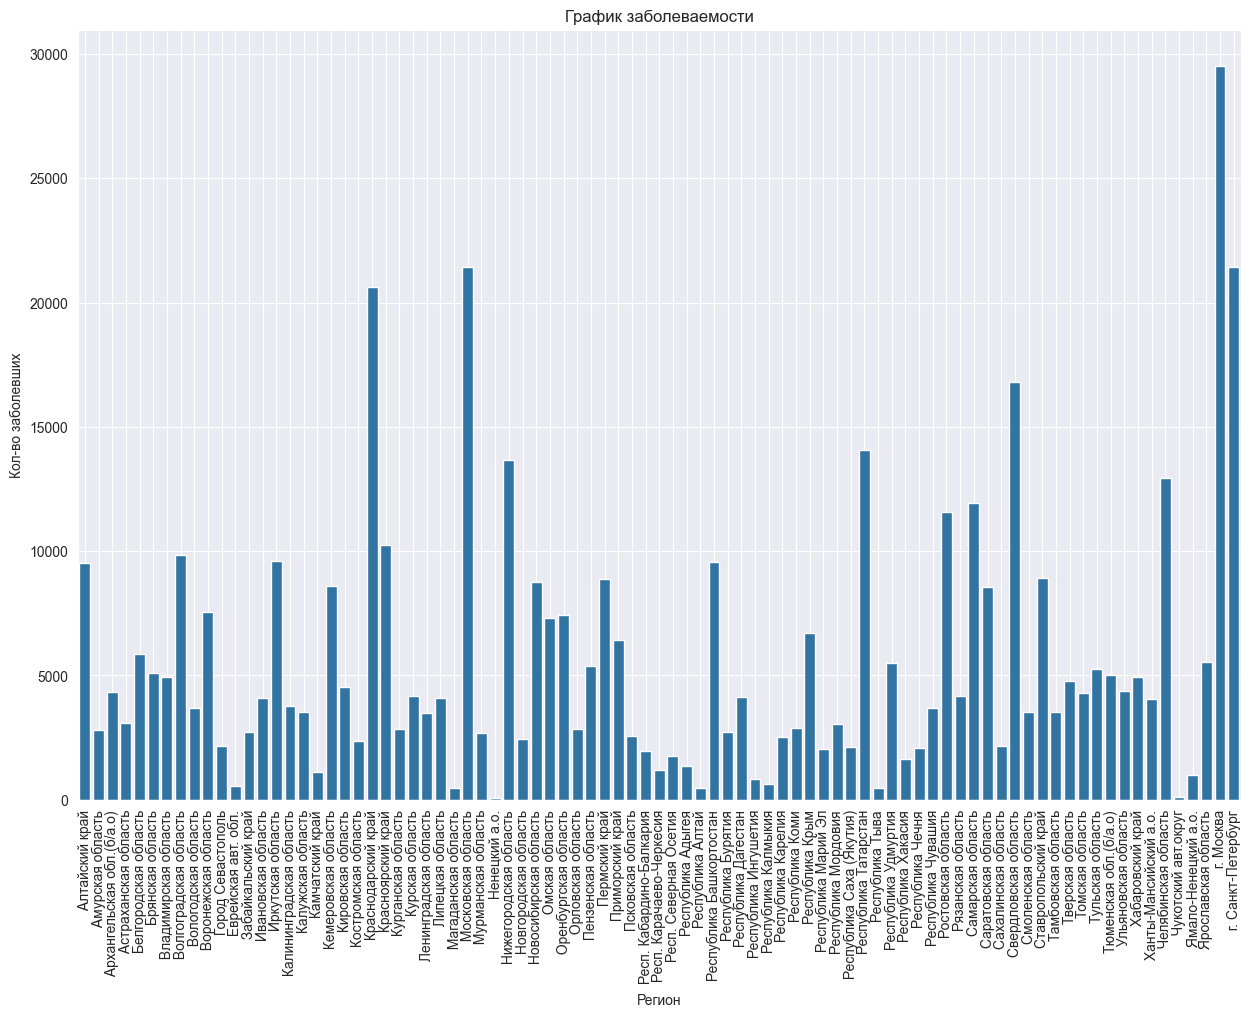

In [93]:
# используем стиль dark из библиотеки seaborn
sns.set_style('dark')
# назначаем размер графика
plt.figure(figsize=(15, 10))
# строим столбчатый график средствами seaborn
sns.barplot(x='Регион', y='Все население абсолютное число', data=data_zno)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График заболеваемости')
plt.xlabel('Регион')
plt.ylabel('Кол-во заболевших')
# поворачиваем подписи значений по оси X на 90 градусов
plt.xticks(rotation=90)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

В Москве и Московской области самый высокий уровень заболеваемости, затем идет Санкт-Петербург и Краснодарский край. Это данные без учета заболеваний индивидуальных органов мужчин и женщин.

Посмотрим данные заболеваемости индивидуальных половых органов

In [94]:
df_two_zno.head()

,Регион,Абсолютное число,"Показатель на 100 тыс. населения ""грубый""",Показатель на 100 тыс. населения стандартизированный,Показатель на 100 тыс. населения ошибка,Индикатор,Локализация,Таблица,Год,workbook,page
0,ЦЕНТРАЛЬНЫЙ ФО,541,"2,56","1,02","0,05",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
1,Белгородская область,25,"3,03","1,19","0,27",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
2,Брянская область,29,"4,55","2,04","0,46",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
3,Владимирская область,24,"3,30","1,11","0,26",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1
4,Воронежская область,36,"2,90","1,12","0,20",Заболеваемость населения территорий россии зло...,Вульва (С51),Таблица 36,2021,2021_Таблица_036_Злокачественные_новообразован...,1-1


In [95]:
bad_regions1 = df_two_zno[df_two_zno.Регион.str.upper().str.contains('ФО')]['Регион'].tolist()
data_except_reg1 = df_two_zno[~df_two_zno.Регион.isin(bad_regions1)]

In [96]:
data_except_reg1['Индикатор'].unique()

array(['Заболеваемость населения территорий россии злокачественными новообразованиями',
       'Смертность населения россии от злокачественных новообразований'],
      dtype=object)

In [97]:
dfz1 = data_except_reg1.query('Индикатор == "Заболеваемость населения территорий россии злокачественными новообразованиями"')
data_zno_gender = pd.pivot_table(dfz1, index=['Регион'], values=['Абсолютное число'], aggfunc = sum)
data_zno_gender.reset_index(inplace=True)
data_zno_gender

,Регион,Абсолютное число
0,Алтайский край,1772
1,Амурская область,532
2,Архангельская обл.(б/а.о),931
3,Астраханская область,528
4,Белгородская область,1162
...,...,...
80,Чукотский авт.округ,15
81,Ямало-Ненецкий а.о.,222
82,Ярославская область,1075
83,г. Москва,6953


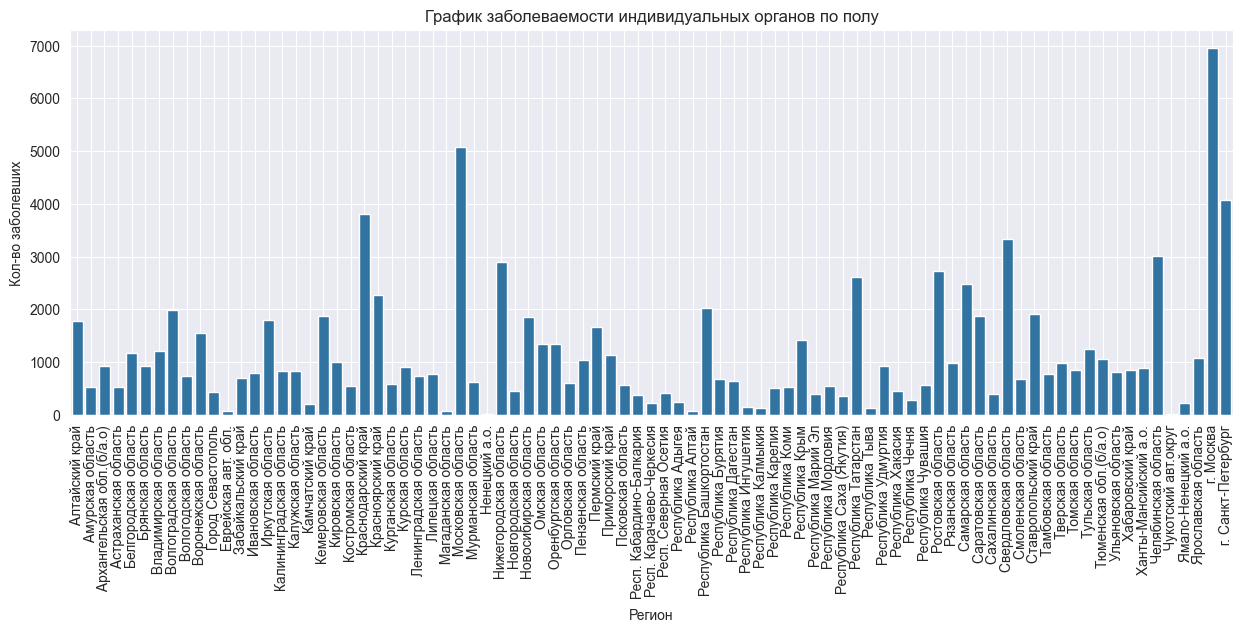

In [98]:
sns.set_style('dark')
plt.figure(figsize=(15, 5))
sns.barplot(x='Регион', y='Абсолютное число', data=data_zno_gender)
plt.title('График заболеваемости индивидуальных органов по полу')
plt.xlabel('Регион')
plt.ylabel('Кол-во заболевших')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Здесь мы видим похожую ситуацию как и в предыдущем графике, только цифры чуть меньше

Посмотрим на общее число заболевших

In [99]:
merge_data_zno = data_zno.merge(data_zno_gender, on="Регион", how="left")
merge_data_zno['sum_sick'] = merge_data_zno['Все население абсолютное число']+merge_data_zno['Абсолютное число']
merge_data_zno.rename(
    columns = {'Все население абсолютное число':'Заболевшие без учета заболеваний индивидуальных половых органов'
    , 'Абсолютное число':'Кол-во заболеваний индивидуальных половых органов'}, inplace = True
)
merge_data_zno

,Регион,Заболевшие без учета заболеваний индивидуальных половых органов,Кол-во заболеваний индивидуальных половых органов,sum_sick
0,Алтайский край,9524,1772,11296
1,Амурская область,2805,532,3337
2,Архангельская обл.(б/а.о),4348,931,5279
3,Астраханская область,3089,528,3617
4,Белгородская область,5876,1162,7038
...,...,...,...,...
80,Чукотский авт.округ,106,15,121
81,Ямало-Ненецкий а.о.,1013,222,1235
82,Ярославская область,5545,1075,6620
83,г. Москва,29505,6953,36458


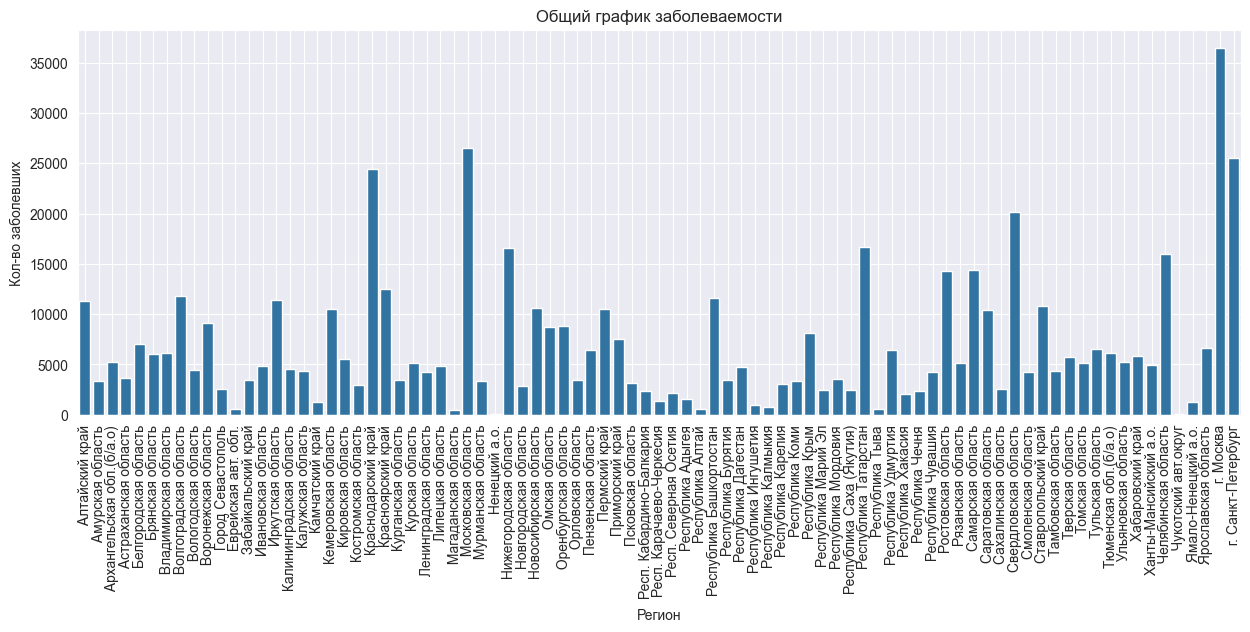

In [100]:
sns.set_style('dark')
plt.figure(figsize=(15, 5))
sns.barplot(x='Регион', y='sum_sick', data=merge_data_zno)
plt.title('Общий график заболеваемости')
plt.xlabel('Регион')
plt.ylabel('Кол-во заболевших')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [101]:
sick_sum = merge_data_zno['sum_sick'].sum()
sick_sum

580430

Общее число заболевших - 580430 человек

**Смертность населения**

In [102]:
data_except_reg['Локализация'].unique()

array(['Губа (С00)', 'Язык (С01,02)', 'Большие слюнные железы (С07,08)',
       'Другие и неуточненные части полости рта (C03-06, 09)',
       'Ротоглотка (С10)', 'Носоглотка (С11)', 'Гортаноглотка (С12,13)',
       'Желудок (С16)', 'Тонкий кишечник (С17)', 'Ободочная кишка (С18)',
       'Прямая кишка, ректосиг. соединение, анус (С19-21)',
       'Печень и внутрипеч. желчные протоки (С22)',
       'Желчный пузырь и внепеченочные желчные протоки (С23,24)',
       'Поджелудочная железа (С25)',
       'Полость носа, среднее ухо, придаточные пазухи (С30,31)',
       'Гортань (С32)', 'Трахея, бронхи, легкое (С33,34)',
       'Кости и суставные хрящи (С40,41)', 'Меланома кожи (С43)',
       'Кожа (кроме меланомы) (С44)',
       'Соединительная и другие мягкие ткани (C47;49)',
       'Молочная железа (С50)', 'Почка (С64)', 'Мочевой пузырь (С67)',
       'Глаз и его придаточный аппарат (С69)',
       'Головной мозг и другие отделы ЦНС (С70-72)',
       'Щитовидная железа (С73)',
       'Лимфа

In [103]:
dfs = data_except_reg.query('Индикатор == "Смертность населения территорий россии от злокачественных новообразований" \
                            and Локализация != "Все причины смерти" and Локализация != "Злокачественные новообразования - всего (С00-96)"')

In [104]:
data_zno_death = pd.pivot_table(dfs, index=['Регион'], values=['Все население абсолютное число'], aggfunc = sum)
data_zno_death.reset_index(inplace=True)
data_zno_death

,Регион,Все население абсолютное число
0,Алтайский край,4296
1,Амурская область,1507
2,Архангельская обл.(б/а.о),2018
3,Астраханская область,1514
4,Белгородская область,2190
...,...,...
80,Чукотский авт.округ,55
81,Ямало-Ненецкий а.о.,395
82,Ярославская область,2289
83,г. Москва,21476


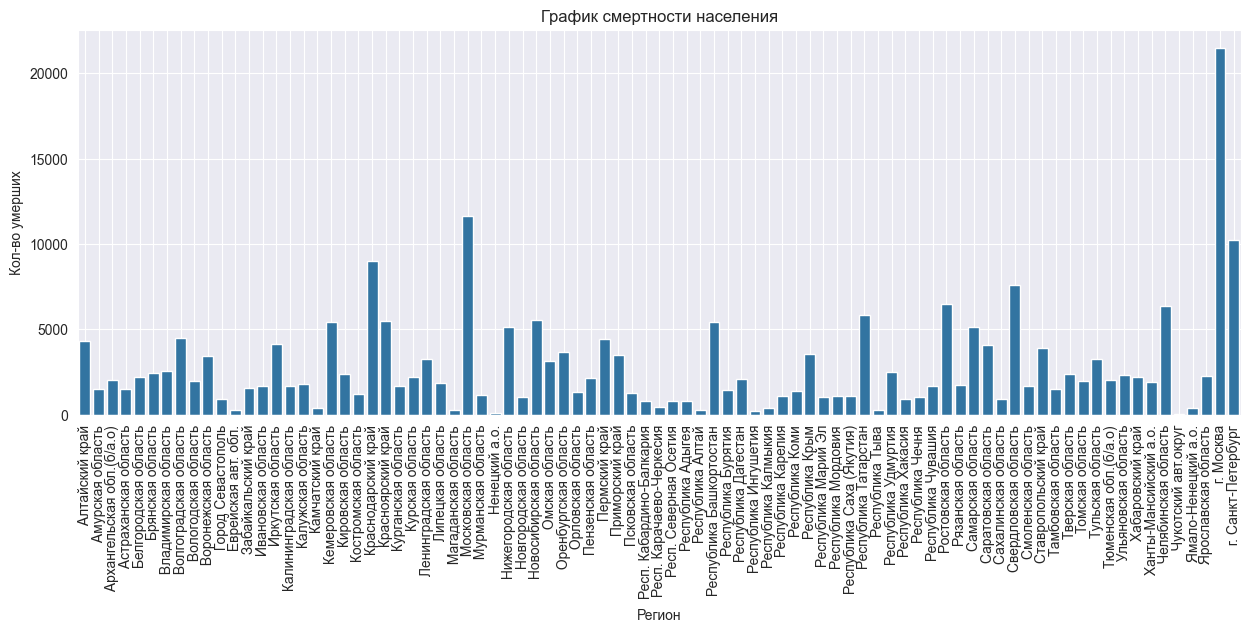

In [105]:
sns.set_style('dark')
plt.figure(figsize=(15, 5))
sns.barplot(x='Регион', y='Все население абсолютное число', data=data_zno_death)
plt.title('График смертности населения')
plt.xlabel('Регион')
plt.ylabel('Кол-во умерших')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Смертность населения по индивидуальным половым органам

In [106]:
data_except_reg1['Локализация'].unique()

array(['Вульва (С51)', 'Влагалище (С52)', 'Шейка матки (С53)',
       'Тело матки (С54)', 'Яичник (С56)', 'Плацента (С58)',
       'Половой член (С60)', 'Предстательная железа (С61)', 'Яичко (С62)',
       'Другие новообразования матки (С54,55)',
       'Другие женские половые органы (С51,52,57,58)',
       'Другие мужские половые органы (С60,62,63)'], dtype=object)

In [107]:
dfs1 = data_except_reg1.query('Индикатор == "Смертность населения россии от злокачественных новообразований"')

In [108]:
data_death_gender = pd.pivot_table(dfs1, index=['Регион'], values=['Абсолютное число'], aggfunc = sum)
data_death_gender.reset_index(inplace=True)
data_death_gender

,Регион,Абсолютное число
0,Алтайский край,579
1,Амурская область,194
2,Архангельская обл.(б/а.о),281
3,Астраханская область,202
4,Белгородская область,317
...,...,...
80,Чукотский авт.округ,6
81,Ямало-Ненецкий а.о.,59
82,Ярославская область,405
83,г. Москва,3310


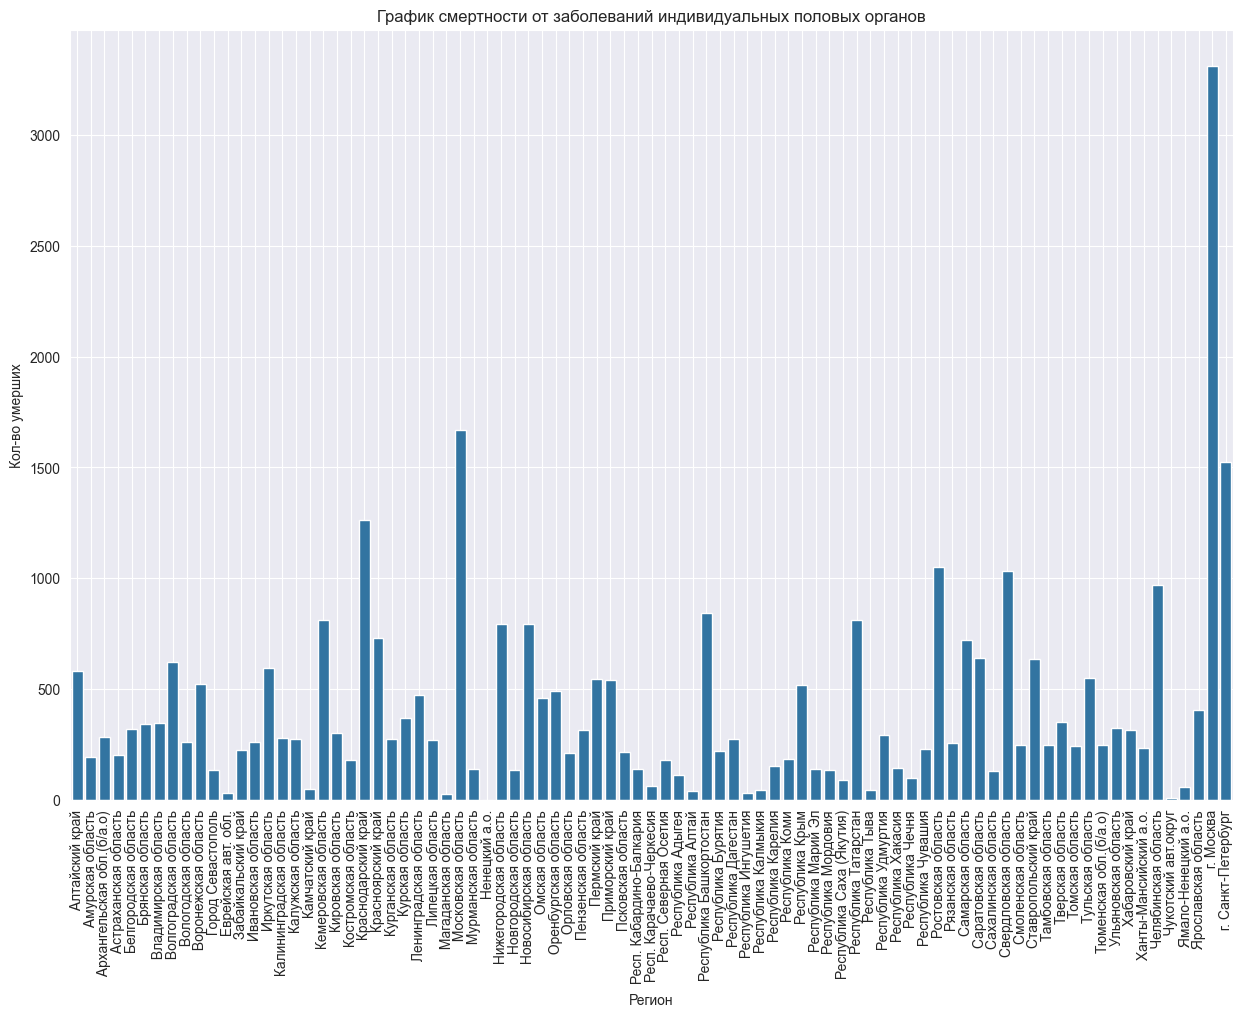

In [109]:
sns.set_style('dark')
plt.figure(figsize=(15, 10))
sns.barplot(x='Регион', y='Абсолютное число', data=data_death_gender)
plt.title('График смертности от заболеваний индивидуальныx половыx органов')
plt.xlabel('Регион')
plt.ylabel('Кол-во умерших')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Соответственно число смертей больше там, где выше заболеваемость

Посмотрим на общее число смертей

In [110]:
merge_data_zno1 = data_zno_death.merge(data_death_gender, on="Регион", how="left")
merge_data_zno1['sum_death'] = merge_data_zno1['Все население абсолютное число']+merge_data_zno1['Абсолютное число']
merge_data_zno1.rename(
    columns = {'Все население абсолютное число':'Умершие без учета умерших от заболевания индивидуальных половых органов'
    , 'Абсолютное число':'Умершие от заболеваний индивидуальных половых органов'}, inplace = True
)
merge_data_zno1

,Регион,Умершие без учета умерших от заболевания индивидуальных половых органов,Умершие от заболеваний индивидуальных половых органов,sum_death
0,Алтайский край,4296,579,4875
1,Амурская область,1507,194,1701
2,Архангельская обл.(б/а.о),2018,281,2299
3,Астраханская область,1514,202,1716
4,Белгородская область,2190,317,2507
...,...,...,...,...
80,Чукотский авт.округ,55,6,61
81,Ямало-Ненецкий а.о.,395,59,454
82,Ярославская область,2289,405,2694
83,г. Москва,21476,3310,24786


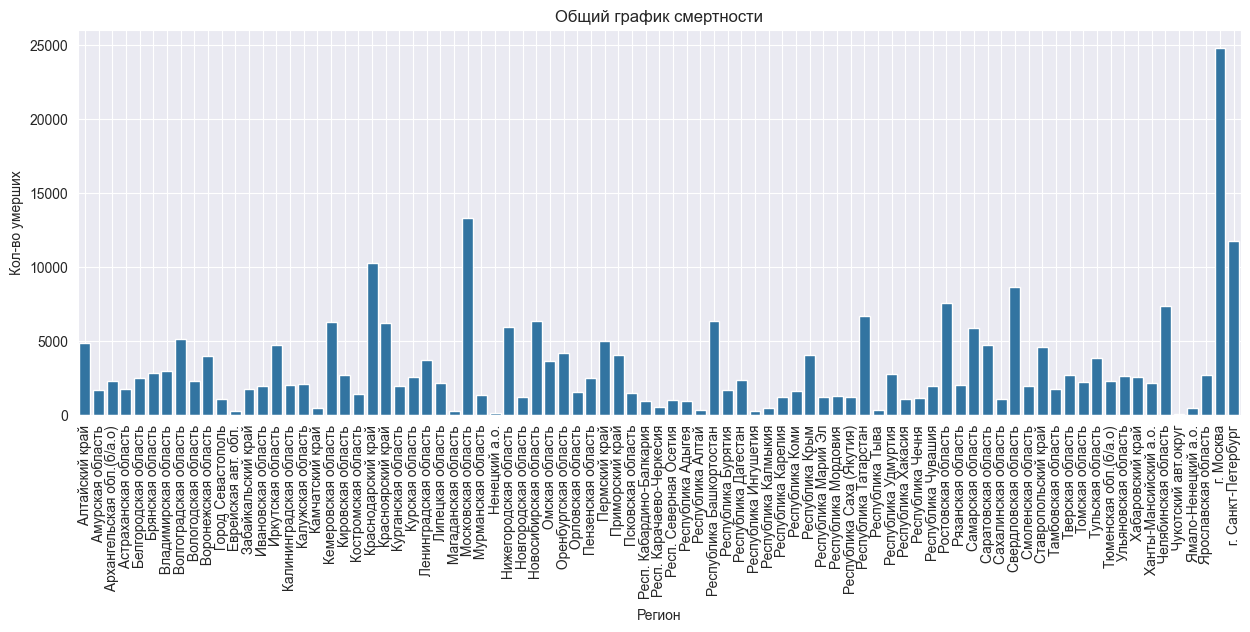

In [111]:
sns.set_style('dark')
plt.figure(figsize=(15, 5))
sns.barplot(x='Регион', y='sum_death', data=merge_data_zno1)
plt.title('Общий график смертности')
plt.xlabel('Регион')
plt.ylabel('Кол-во умерших')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [112]:
death_sum = merge_data_zno1['sum_death'].sum ()
death_sum

274999

Общее число умерших достигает 275 тысяч

In [113]:
round(death_sum/sick_sum*100, 2)

47.38

Отношение умерших к заболевшим примерно 47%

**Состояние онкопомощи**

In [114]:
df_one_sop.head()

,Регион,"Число ЗНО, выявленных в отчетном году, радикальное лечение которых закончено в отчетном году, чел.","Число ЗНО, выявленных в отчетном году, радикальное лечение которых закончено в отчетном году, % от впервые выявленных","Число ЗНО, выявленных в отчетном году, радикальное лечение которых будет продолжено в отчетом году, чел.","Число ЗНО, выявленных в отчетном году, радикальное лечение которых будет продолжено в отчетном году, % от впервые выявленных","В том числе с использованием методов только хирургического, %","В том числе с использованием методов только лучевого, %","В том числе с использованием методов только лекарственного, %","В том числе с использованием методов комбинированного или комплексного (кроме химиолучевого), %","В том числе с использованием методов химиолучевого, %",Индикатор,Локализация,Таблица,workbook,page
1,ЦЕНТРАЛЬНЫЙ ФО,70193,49.6,27899,19.7,56.4,6.9,3.8,30.6,2.3,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
2,Белгородская область,3952,57.1,1418,20.5,53.6,12.7,2.9,27.9,2.9,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
3,Брянская область,2673,46.9,1236,21.7,54.0,2.3,7.6,34.3,1.8,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
4,Владимирская область,2858,51.9,808,14.7,59.0,2.4,0.0,37.5,1.1,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1
5,Воронежская область,5305,58.8,1635,18.1,53.9,9.4,2.3,32.5,1.8,Сведения о лечении злокачественных новообразов...,Злокачественные новообразования - всего (С00-96),Таблица 58,2021_Таблица_058_Состояние_онко_помощи_в_РФ.xlsx,Table 1


In [115]:
df_two_sop.head()

,Регион,Взято на учет больных с впервые в жизни уст. диагнозом ЗНО,"в т.ч. вы- явлены активно,%","Находились на учете на конец года, абс.число","Находились на учете на конец года, на 100 тыс. населения","Из них 5 лет и более, абс.число","Из них 5 лет и более, % от сост. на учете",Индекс накопления контингентов,"Летальность,%",Индикатор,Локализация,Таблица,Год,workbook,page
1,ЦЕНТРАЛЬНЫЙ ФО,308,41.6,6239,15.9,4679,75.0,20.3,1.2,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
2,Белгородская область,17,47.1,357,23.1,243,68.1,21.0,0.6,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
3,Брянская область,17,47.1,300,25.3,220,73.3,17.6,0.7,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
4,Владимирская область,16,12.5,275,20.4,201,73.1,17.2,1.8,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
5,Воронежская область,44,34.1,767,33.1,588,76.7,17.4,0.9,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1


In [116]:
regions_bad = df_two_sop[df_two_sop.Регион.str.upper().str.contains('ФО')]['Регион'].tolist()
data_two_sop = df_two_sop[~df_two_sop.Регион.isin(regions_bad)]

In [117]:
data_two_sop

,Регион,Взято на учет больных с впервые в жизни уст. диагнозом ЗНО,"в т.ч. вы- явлены активно,%","Находились на учете на конец года, абс.число","Находились на учете на конец года, на 100 тыс. населения","Из них 5 лет и более, абс.число","Из них 5 лет и более, % от сост. на учете",Индекс накопления контингентов,"Летальность,%",Индикатор,Локализация,Таблица,Год,workbook,page
2,Белгородская область,17,47.1,357,23.1,243,68.1,21.0,0.6,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
3,Брянская область,17,47.1,300,25.3,220,73.3,17.6,0.7,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
4,Владимирская область,16,12.5,275,20.4,201,73.1,17.2,1.8,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
5,Воронежская область,44,34.1,767,33.1,588,76.7,17.4,0.9,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
6,Ивановская область,19,47.4,189,19.1,132,69.8,9.9,0.0,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Губа (С00),Таблица 27,2021,2021_Таблица_027_Состояние_онко_помощи_в_РФ.xlsx,Table 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Забайкальский край,52,1.9,469,44.4,294,62.7,9.0,10.7,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2
90,Чукотский авт.округ,1,100.0,7,14.0,2,28.6,7.0,0.0,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2
91,Республика Бурятия,29,6.9,311,31.6,184,59.2,10.7,7.2,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2
92,Республика Саха (Якутия),52,11.5,379,38.8,238,62.8,7.3,6.0,СВЕДЕНИЯ ОКОНТИНГЕНТЕ БОЛЬНЫХ СО ЗЛОКАЧЕСТВЕНН...,Лейкемии (С91-95),Таблица 51,2021,2021_Таблица_051_Состояние_онко_помощи_в_РФ.xlsx,Table 2


In [118]:
data_two_sop['Локализация'].unique()

array(['Губа (С00)', 'Полость рта (C01-09)', 'Глотка (С10-13)',
       'Пищевод (С15)', 'Желудок (С16)', 'Ободочная кишка (С18)',
       'Прямая кишка, ректосиг. соединение, анус (С19-21)',
       'Печень и внутрипеченочные желчные протоки (С22)',
       'Поджелудочная железа (С25)', 'Гортань (С32)',
       'Трахея, бронхи, легкое (С33,34)',
       'Кости и суставные хрящи (С40,41)', 'Меланома кожи (С43)',
       'Кожа (кроме меланомы) (С44)',
       'Соединительная и другие мягкие ткани (С47,49)',
       'Молочная железа (С50)', 'Шейка матки (С53)', 'Тело матки (С54)',
       'Яичник (С56)', 'Предстательная железа (С61)', 'Почка (С64)',
       'Мочевой пузырь (С67)', 'Щитовидная железа (С73)',
       'Злокачественные лимфомы (С81-86;88,90,96)', 'Лейкемии (С91-95)'],
      dtype=object)

Посмотрим средний процент летальности по регионам по каждой локализации поблезни

In [119]:
lethality_localization = pd.pivot_table(data_two_sop, index=['Локализация'], values=['Летальность,%'])
lethality_localization.reset_index(inplace=True)
lethality_localization

,Локализация,"Летальность,%"
0,Глотка (С10-13),16.060000
1,Гортань (С32),7.600000
2,Губа (С00),1.117647
3,Желудок (С16),13.887059
4,"Злокачественные лимфомы (С81-86;88,90,96)",4.657647
5,Кожа (кроме меланомы) (С44),0.365882
6,"Кости и суставные хрящи (С40,41)",4.055294
7,Лейкемии (С91-95),5.252941
8,Меланома кожи (С43),3.211765
9,Молочная железа (С50),2.591765


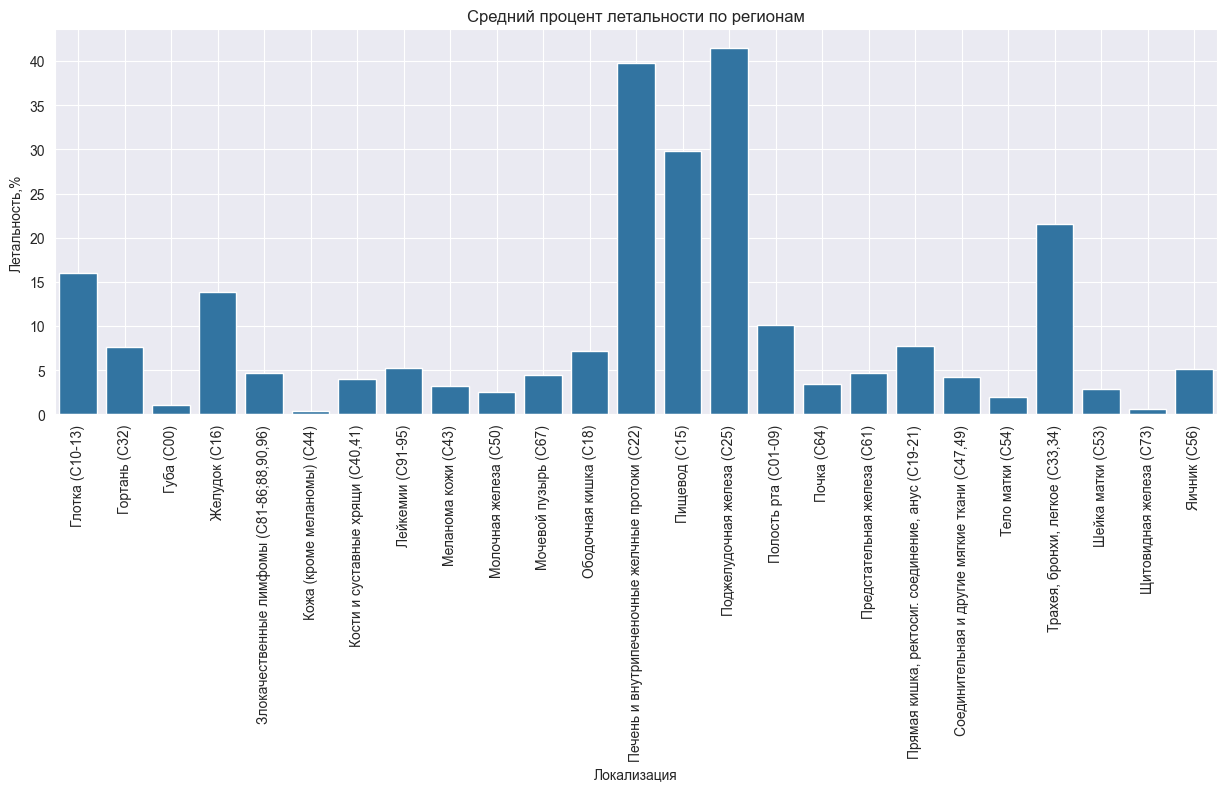

In [120]:
sns.set_style('dark')
plt.figure(figsize=(15, 5))
sns.barplot(x='Локализация', y='Летальность,%', data=lethality_localization)
plt.title('Средний процент летальности по регионам')
plt.xlabel('Локализация')
plt.ylabel('Летальность,%')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Самая высокая летальность от заболеваний печени и внутрипеченочных желчных протоков, пищевода и поджелудочной железы

Посмотрим на прирост заболеваемости

In [121]:
df_table_five['gender'].unique()

array(['ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. населения)',
       'МУЖЧИНЫ («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. населения)',
       'ЖЕНЩИНЫ («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. населения)',
       'ОБА ПОЛА (СТАНДАРТИЗОВАННЫЕ ПОКАЗАТЕЛИ  на 100 тыс. населения, МИРОВОЙ СТАНДАРТ)',
       'МУЖЧИНЫ (СТАНДАРТИЗОВАННЫЕ ПОКАЗАТЕЛИ на 100 тыс. населения, МИРОВОЙ СТАНДАРТ)',
       'ЖЕНЩИНЫ (СТАНДАРТИЗОВАННЫЕ ПОКАЗАТЕЛИ  на 100 тыс. населения, МИРОВОЙ СТАНДАРТ)'],
      dtype=object)

In [122]:
growth_zno = df_table_five.query('gender == "ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. населения)"')
growth_zno

,Регион,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,"Среднегодовой темп прироста, %","Прирост, %",gender,workbook,name_table
1,РОССИЯ,365.42,367.29,373.42,388.03,402.57,408.62,420.3,425.46,436.34,379.65,397.91,1.13,12.05,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
2,Центральный Федеральный округ,377.39,374.5,384.46,396.27,413.72,412.33,425.94,431.95,436.74,368.21,379.33,"0,51*","5,26*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
3,Северо-Западный Федеральный округ,378.06,381.02,388.06,407.59,445.03,451.16,450.61,454.01,476.68,417.19,428.18,1.62,17.83,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
4,Южный Федеральный округ**,389.64,404.36,400.32,400.98,396.57,415.06,429.76,435.82,439.87,386.08,406.93,"0,20*","1,41*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
5,Северо-Кавказский Федеральный округ,240.69,236.56,233.43,242.28,254.1,256.96,262.03,264.43,267.2,238.37,249.19,"0,74*","7,72*",ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
6,Приволжский Федеральный округ,371.85,373.66,385.31,405.66,415.97,424.52,434.88,436.1,451.78,399.85,424.68,1.43,15.55,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
7,Уральский Федеральный округ,362.22,362.97,366.44,374.69,392.56,397.67,414.75,421.94,440.17,389.49,420.52,1.69,18.67,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
8,Сибирский Федеральный округ***,387.77,394.11,395.09,417.31,432.26,441.76,455.09,464.5,474.03,417.47,435.17,1.45,15.78,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...
9,Дальневосточ. Федеральный округ***,326.45,325.87,336.47,356.18,369.37,375.8,394.66,403.52,417.56,359.52,387.28,1.98,22.21,ОБА ПОЛА («ГРУБЫЕ» ПОКАЗАТЕЛИ на 100 тыс. насе...,2021_Таблица_005_Злокачественные_новообразован...,Динамика показателей заболеваемости злокачеств...


In [123]:
growth_zno.drop (index=growth_zno.index[0], axis = 0, inplace = True )

In [124]:
growth = pd.pivot_table(growth_zno, index=['Регион'], values=['Прирост, %'], aggfunc = sum)
growth.reset_index(inplace=True)
growth

,Регион,"Прирост, %"
0,Дальневосточ. Федеральный округ***,22.21
1,Приволжский Федеральный округ,15.55
2,Северо-Западный Федеральный округ,17.83
3,Северо-Кавказский Федеральный округ,"7,72*"
4,Сибирский Федеральный округ***,15.78
5,Уральский Федеральный округ,18.67
6,Центральный Федеральный округ,"5,26*"
7,Южный Федеральный округ**,"1,41*"


In [125]:
# выберем столбцы по которым будем строить график
df_growth = growth_zno.iloc [:, [0,1,2,3,4,5,6,7,8,9,10,11]]
# сделаем первый столбец индексом
df_growth.set_index('Регион',inplace=True)

In [126]:
#транспонируем таблицу
df_transposed = df_growth.transpose()

In [127]:
df_transposed

Регион,Центральный Федеральный округ,Северо-Западный Федеральный округ,Южный Федеральный округ**,Северо-Кавказский Федеральный округ,Приволжский Федеральный округ,Уральский Федеральный округ,Сибирский Федеральный округ***,Дальневосточ. Федеральный округ***
2011,377.39,378.06,389.64,240.69,371.85,362.22,387.77,326.45
2012,374.5,381.02,404.36,236.56,373.66,362.97,394.11,325.87
2013,384.46,388.06,400.32,233.43,385.31,366.44,395.09,336.47
2014,396.27,407.59,400.98,242.28,405.66,374.69,417.31,356.18
2015,413.72,445.03,396.57,254.1,415.97,392.56,432.26,369.37
2016,412.33,451.16,415.06,256.96,424.52,397.67,441.76,375.8
2017,425.94,450.61,429.76,262.03,434.88,414.75,455.09,394.66
2018,431.95,454.01,435.82,264.43,436.1,421.94,464.5,403.52
2019,436.74,476.68,439.87,267.2,451.78,440.17,474.03,417.56
2020,368.21,417.19,386.08,238.37,399.85,389.49,417.47,359.52


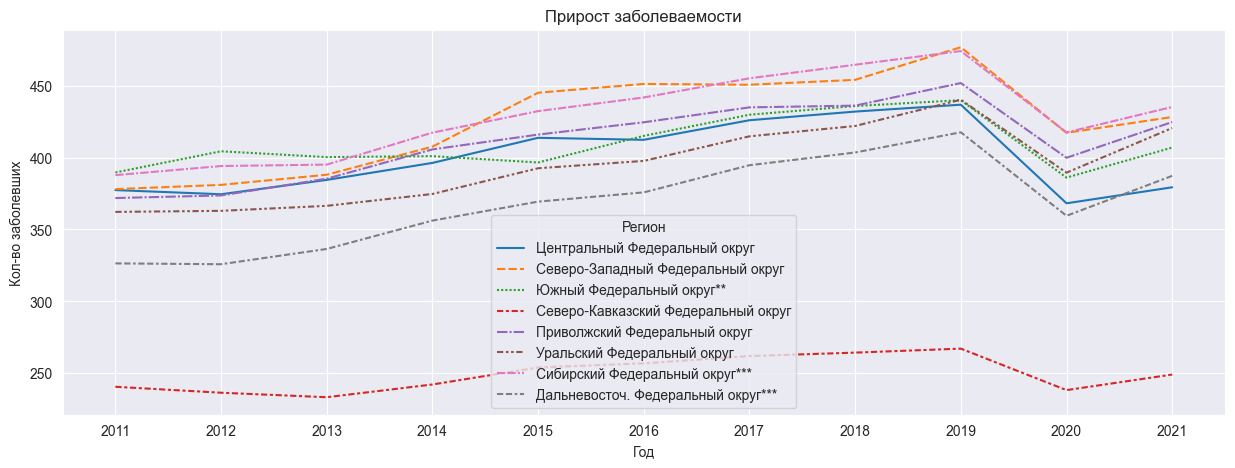

In [128]:
sns.set_style('dark')
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_transposed)
plt.title('Прирост заболеваемости')
plt.xlabel('Год')
plt.ylabel('Кол-во заболевших')
plt.grid()
plt.show()

Северо-Кавказский Федеральный округ самый здоровый